# Predicting Fraud in Auto Insurance Claims

__Problem Statement:__ <br>
A major general insurance company has a business problem with significant number of claims being reported are fraudulent in nature and it is leading to leakages. The task is to predict the fraudulent ones before even processing the claims to allocate costs appropriately, to keep the thorough investigation process in place and to design proper action plan for the claims to be approved. The goal of the project is prediction of fraud plays in auto insurance claims.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
%matplotlib inline

## Reading the required csv files
__Demographic Data:__ 
- CustomerID 
- InsuredAge
- InsuredZipCode
- InsuredGender
- InsuredEducationLevel
- InsuredOccupation
- InsuredHobbies
- CapitalGains
- CapitalLoss
- Country 

(Given that InsuredGender column has missing value represented as 'NA' which we account for while reading the csv file using na_values.)

In [3]:
print('Demographic Data \n')

Demographics_data = pd.read_csv('Train_Demographics.csv', na_values = ['NA'])

# counting the number of rows and columns 
print('The shape of the Train_Demographics file is ',  Demographics_data.shape, 'i.e., the file consists of', 
      Demographics_data.shape[1], 'columns and', Demographics_data.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Demographics_data.head())

# veiwing the last five rows of the datasets
display(Demographics_data.tail())

#train = pd.read_csv('train_data.csv', na_values = ['$', '#', 'Null', '?'])

Demographic Data 

The shape of the Train_Demographics file is  (28836, 10) i.e., the file consists of 10 columns and 28836 rows


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India
28835,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India


In [4]:
Demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


InsuredZipCode, although numbers, represent regions in the country and hence are categorical variables. So we convert its data type from int64 to object.

In [5]:
Demographics_data['InsuredZipCode'] = Demographics_data['InsuredZipCode'].astype('object')
Demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  object
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(3), object(7)
memory usage: 2.2+ MB


__Policy Information:__
- InsurancePolicyNumber	
- CustomerLoyaltyPeriod	
- DateOfPolicyCoverage	
- InsurancePolicyState	
- Policy_CombinedSingleLimit	
- Policy_Deductible	
- PolicyAnnualPremium	
- UmbrellaLimit	
- InsuredRelationship	
- CustomerID

(Given that PolicyAnnualPremium has missing value represented as '-1', TotalCharges has missing values denoted as 'MISSINGVAL' and ContractType has missing values denoted as 'NA' which we account for while reading the csv file using na_values. Note that none of the other columns have any value similar to '-1' and hence making this change will not affect the data in any other column.)

In [6]:
print('Policy Information \n')

Policy_information = pd.read_csv('Train_Policy.csv', na_values = ['-1', 'MISSINGVAL', 'NA'])

# counting the number of rows and columns 
print('The shape of the Train_Policy file is ',  Policy_information.shape, 'i.e., the file consists of', 
      Policy_information.shape[1], 'columns and', Policy_information.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Policy_information.head())

# veiwing the last five rows of the datasets
display(Policy_information.tail())

Policy Information 

The shape of the Train_Policy file is  (28836, 10) i.e., the file consists of 10 columns and 28836 rows


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497
28835,148619,331,2006-07-16,State3,250/500,1000,1062.91,0,wife,Cust39498


Policy_CombinedSingleLimit has two values split limit and combined single limit separated by '/', so we split the column into two columns namely, 'SplitLimit' and 'CombinedSingleLimit'

In [7]:
Policy_information[['SplitLimit','CombinedSingleLimit']] = Policy_information['Policy_CombinedSingleLimit'].str.split("/", expand = True)
Policy_information.drop('Policy_CombinedSingleLimit', axis = 1, inplace = True)
Policy_information

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID,SplitLimit,CombinedSingleLimit
0,110122,328,2014-10-17,State3,1000,1406.91,0,husband,Cust1001,250,500
1,110125,256,1990-05-25,State1,2000,1415.74,6000000,unmarried,Cust1004,250,500
2,110126,228,2014-06-06,State1,1000,1583.91,6000000,unmarried,Cust1005,500,1000
3,110127,256,2006-10-12,State3,1000,1351.10,0,unmarried,Cust1006,250,500
4,110128,137,2000-06-04,State2,1000,1333.35,0,husband,Cust1007,250,500
...,...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,1000,839.81,0,wife,Cust39493,250,500
28832,148615,367,1996-11-09,State3,1000,811.03,0,husband,Cust39494,250,500
28833,148616,208,1995-12-04,State3,1000,891.37,0,husband,Cust39495,250,500
28834,148618,401,1994-09-12,State3,856,911.37,0,own-child,Cust39497,250,500


We convert the data type of SplitLimit and CombinedSingleLimit to int64.

In [9]:
Policy_information['SplitLimit'] = Policy_information['SplitLimit'].astype('int64')
Policy_information['CombinedSingleLimit'] = Policy_information['CombinedSingleLimit'].astype('int64')

We also convert the data type of DateOfPolicyCoverage to datetime.

In [10]:
Policy_information['DateOfPolicyCoverage'] = pd.to_datetime(Policy_information['DateOfPolicyCoverage'], format='%Y-%m-%d')
# creating new columns for each day, month and year
Policy_information['DayOfPolicyCoverage'] = Policy_information['DateOfPolicyCoverage'].dt.day
Policy_information['MonthOfPolicyCoverage'] = Policy_information['DateOfPolicyCoverage'].dt.month
Policy_information['YearOfPolicyCoverage'] = Policy_information['DateOfPolicyCoverage'].dt.year
Policy_information.drop('DateOfPolicyCoverage', axis = 1, inplace = True)
Policy_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InsurancePolicyNumber  28836 non-null  int64  
 1   CustomerLoyaltyPeriod  28836 non-null  int64  
 2   InsurancePolicyState   28836 non-null  object 
 3   Policy_Deductible      28836 non-null  int64  
 4   PolicyAnnualPremium    28695 non-null  float64
 5   UmbrellaLimit          28836 non-null  int64  
 6   InsuredRelationship    28836 non-null  object 
 7   CustomerID             28836 non-null  object 
 8   SplitLimit             28836 non-null  int64  
 9   CombinedSingleLimit    28836 non-null  int64  
 10  DayOfPolicyCoverage    28836 non-null  int64  
 11  MonthOfPolicyCoverage  28836 non-null  int64  
 12  YearOfPolicyCoverage   28836 non-null  int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 2.9+ MB


__Claim Information:__
- CustomerID	
- DateOfIncident	
- TypeOfIncident	
- TypeOfCollission	
- SeverityOfIncident	
- AuthoritiesContacted	
- IncidentState	
- IncidentCity	
- IncidentAddress	
- IncidentTime	
- NumberOfVehicles	
- PropertyDamage	
- BodilyInjuries	
- Witnesses	PoliceReport	
- AmountOfTotalClaim	
- AmountOfInjuryClaim	 
- AmountOfPropertyClaim	
- AmountOfVehicleDamage

(Given that TypeOfCollission has missing values denoted as '?', IncidentTime has missing value represented as '-5', PropertyDamage has missing values denoted as '?', Witnesses has missing value represented as 'MISSINGVALUE', PoliceReport has missing values denoted as '?' and AmountOfTotalClaim has missing value represented as 'MISSEDDATA' which we account for while reading the csv file using na_values. Note that none of the other columns have any value similar to '-5' and hence making this change will not affect the data in any other column.)

In [11]:
print('Claim Information \n')

Claim_information = pd.read_csv('Train_Claim.csv', na_values = ['?', '-5',  'MISSINGVALUE', 'MISSEDDATA'])

# counting the number of rows and columns
print('The shape of the Train_Claim file is ',  Claim_information.shape, 'i.e., the file consists of', 
      Claim_information.shape[1], 'columns and', Claim_information.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Claim_information.head())

# veiwing the last five rows of the datasets
display(Claim_information.tail())

Claim Information 

The shape of the Train_Claim file is  (28836, 19) i.e., the file consists of 19 columns and 28836 rows


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17.0,3,NaN,1,0.0,NaN,65501.0,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10.0,3,YES,2,1.0,YES,61382.0,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22.0,1,YES,2,3.0,NO,66755.0,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22.0,1,YES,2,3.0,NO,66243.0,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10.0,1,NO,2,1.0,YES,53544.0,8829,7234,37481


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
28831,Cust9993,2015-01-24,Vehicle Theft,NaN,Trivial Damage,Police,State9,City4,Location 1890,3.0,1,NO,0,3.0,NaN,6590.0,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17.0,1,YES,0,2.0,YES,74547.0,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1.0,1,YES,2,0.0,YES,55305.0,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1.0,1,NaN,2,0.0,YES,55830.0,7059,7059,41712
28835,Cust9999,2015-01-13,Single Vehicle Collision,Front Collision,Total Loss,Other,State8,City3,Location 1874,9.0,1,NO,1,3.0,YES,68969.0,12075,6038,50856


Converting the data types of DateOfIncident from object to datetime and extracting the day, month and year as separate columns. We also drop the DateOfIncident column.

In [13]:
Claim_information['DateOfIncident'] = pd.to_datetime(Claim_information['DateOfIncident'], format='%Y-%m-%d')
Claim_information['IncidentDay'] = Claim_information['DateOfIncident'].dt.day
Claim_information['IncidentMonth'] = Claim_information['DateOfIncident'].dt.month
Claim_information['IncidentYear'] = Claim_information['DateOfIncident'].dt.year
Claim_information.drop('DateOfIncident', axis = 1, inplace = True)

In [15]:
Claim_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             28836 non-null  object 
 1   TypeOfIncident         28836 non-null  object 
 2   TypeOfCollission       23674 non-null  object 
 3   SeverityOfIncident     28836 non-null  object 
 4   AuthoritiesContacted   28836 non-null  object 
 5   IncidentState          28836 non-null  object 
 6   IncidentCity           28836 non-null  object 
 7   IncidentAddress        28836 non-null  object 
 8   IncidentTime           28805 non-null  float64
 9   NumberOfVehicles       28836 non-null  int64  
 10  PropertyDamage         18377 non-null  object 
 11  BodilyInjuries         28836 non-null  int64  
 12  Witnesses              28790 non-null  float64
 13  PoliceReport           19031 non-null  object 
 14  AmountOfTotalClaim     28786 non-null  float64
 15  Am

__Data of Vehicle:__
- CustomerID	
- VehicleAttribute	
- VehicleAttributeDetails

(Given that VehicleAttributeDetails has missing values represented as '???' which we account for while reading the csv file using na_values)

In [16]:
print('Data of Vehicle \n')

Data_of_vehicle = pd.read_csv('Train_Vehicle.csv', na_values = ['???'])

# counting the number of rows and columns
print('The shape of the Train_Vehicle file is ',  Data_of_vehicle.shape, 'i.e., the file consists of', 
      Data_of_vehicle.shape[1], 'columns and', Data_of_vehicle.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Data_of_vehicle.head())

# veiwing the last five rows of the datasets
display(Data_of_vehicle.tail())

Data of Vehicle 

The shape of the Train_Vehicle file is  (115344, 3) i.e., the file consists of 3 columns and 115344 rows


,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


,CustomerID,VehicleAttribute,VehicleAttributeDetails
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680
115343,Cust14156,VehicleModel,Corolla


In [17]:
len(Data_of_vehicle['CustomerID'].unique())

28836

This file has 4 times the number of rows compared to the other files, so we divide the data interms of the attribute column and create 4 new columns namely 'VehicleMake', 'VehicleID', 'VehicleModel', 'VehicleYOM' to replace 'VehicleAttribute' and 'VehicleAttributeDetails'. 

In [18]:
gr = Data_of_vehicle.groupby(['VehicleAttribute'])

In [19]:
a = gr.get_group(('VehicleMake'))
a.drop('VehicleAttribute', axis = 1, inplace = True)
a.rename(columns = {'VehicleAttributeDetails':'VehicleMake'}, inplace = True)
a

,CustomerID,VehicleMake
2,Cust33335,Toyota
9,Cust20624,Chevrolet
13,Cust9006,Accura
15,Cust18447,Honda
20,Cust17021,BMW
...,...,...
115333,Cust27692,Ford
115336,Cust2507,Saab
115337,Cust17851,Chevrolet
115338,Cust11205,Chevrolet


In [20]:
b = gr.get_group(('VehicleID'))
b.drop('VehicleAttribute', axis = 1, inplace = True)
b.rename(columns = {'VehicleAttributeDetails':'VehicleID'}, inplace = True)
b

,CustomerID,VehicleID
0,Cust20179,Vehicle8898
4,Cust13038,Vehicle30212
5,Cust1801,Vehicle24096
10,Cust14947,Vehicle15216
16,Cust19144,Vehicle29018
...,...,...
115334,Cust2970,Vehicle19228
115335,Cust19731,Vehicle12644
115340,Cust25338,Vehicle28831
115341,Cust7637,Vehicle12870


In [21]:
c = gr.get_group(('VehicleModel'))
c.drop('VehicleAttribute', axis = 1, inplace = True)
c.rename(columns = {'VehicleAttributeDetails':'VehicleModel'}, inplace = True)
c

,CustomerID,VehicleModel
1,Cust21384,Malibu
3,Cust27118,Neon
6,Cust30237,RAM
27,Cust23684,Neon
33,Cust35737,Wrangler
...,...,...
115326,Cust38183,95
115328,Cust27059,Maxima
115330,Cust4899,92x
115331,Cust7088,F150


In [22]:
d = gr.get_group(('VehicleYOM'))
d.drop('VehicleAttribute', axis = 1, inplace = True)
d.rename(columns = {'VehicleAttributeDetails':'VehicleYOM'}, inplace = True)
d

,CustomerID,VehicleYOM
7,Cust21334,1996
8,Cust26634,1999
11,Cust21432,2002
12,Cust22845,2000
14,Cust30659,2003
...,...,...
115313,Cust13546,2011
115320,Cust27958,2015
115322,Cust27100,2011
115329,Cust11761,1997


In [23]:
Vehicle_data = a.merge(b, on = 'CustomerID').merge(c, on = 'CustomerID').merge(d, on = 'CustomerID')
Vehicle_data

,CustomerID,VehicleMake,VehicleID,VehicleModel,VehicleYOM
0,Cust33335,Toyota,Vehicle8998,Highlander,2001
1,Cust20624,Chevrolet,Vehicle10465,Malibu,2007
2,Cust9006,Accura,Vehicle32135,TL,2013
3,Cust18447,Honda,Vehicle17863,Civic,1997
4,Cust17021,BMW,Vehicle38513,M5,1999
...,...,...,...,...,...
28831,Cust27692,Ford,Vehicle20150,Escape,2001
28832,Cust2507,Saab,Vehicle17808,95,1999
28833,Cust17851,Chevrolet,Vehicle8079,Malibu,2002
28834,Cust11205,Chevrolet,Vehicle25234,Silverado,2012


In [24]:
Vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleMake   28786 non-null  object
 2   VehicleID     28836 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


__Fraud Data:__
- CustomerID	
- ReportedFraud

In [25]:
print('Fraud Data \n')

Fraud_data = pd.read_csv('Traindata_with_Target.csv')

# counting the number of rows and columns
print('The shape of the Traindata_with_Target is ',  Fraud_data.shape, 'i.e., the file consists of', 
      Fraud_data.shape[1], 'columns and', Fraud_data.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Fraud_data.head())

# veiwing the last five rows of the datasets
display(Fraud_data.tail())

Fraud Data 

The shape of the Traindata_with_Target is  (28836, 2) i.e., the file consists of 2 columns and 28836 rows


,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


,CustomerID,ReportedFraud
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N
28835,Cust29555,N


In [26]:
Fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     28836 non-null  object
 1   ReportedFraud  28836 non-null  object
dtypes: object(2)
memory usage: 450.7+ KB


__Merging the data__ <br>
Now we merge all the above data sets to obtain the training data.

In [27]:
Train_data = Demographics_data.merge(Policy_information, on = 'CustomerID').merge(Claim_information, on = 'CustomerID').merge(Vehicle_data, on = 'CustomerID').merge(Fraud_data, on = 'CustomerID')
Train_data

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,AmountOfPropertyClaim,AmountOfVehicleDamage,IncidentDay,IncidentMonth,IncidentYear,VehicleMake,VehicleID,VehicleModel,VehicleYOM,ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,6071,46013,3,2,2015,Audi,Vehicle26917,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,5919,39903,2,2,2015,Audi,Vehicle15893,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,11630,43495,15,1,2015,Volkswagen,Vehicle5152,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,12003,42237,19,1,2015,Volkswagen,Vehicle37363,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,7234,37481,9,1,2015,Toyota,Vehicle28633,CRV,2010,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,...,1078,4642,24,1,2015,Suburu,Vehicle13568,Impreza,2007,N
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,...,7875,51973,9,2,2015,Jeep,Vehicle19810,Wrangler,2003,N
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,...,7043,41219,28,1,2015,Suburu,Vehicle3339,Legacy,2004,N
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,7059,41712,28,1,2015,Suburu,Vehicle10240,Forrestor,2004,N


In [28]:
Train_data.shape

(28836, 47)

In [29]:
Train_data.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'SplitLimit', 'CombinedSingleLimit', 'DayOfPolicyCoverage',
       'MonthOfPolicyCoverage', 'YearOfPolicyCoverage', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'IncidentDay',
       'IncidentMonth', 'IncidentYear', 'VehicleMake', 'VehicleID',
       'VehicleModel', 'VehicleYOM', 'ReportedFraud'],
      dtyp

We create two new columns namely VehicleAge and PolicyAge and drop all other dates related to that.

In [30]:
Train_data['VehicleAge'] = Train_data['IncidentYear'].apply(int) - Train_data['VehicleYOM'].apply(int)
Train_data['PolicyAge'] = Train_data['IncidentYear'].apply(int) - Train_data['YearOfPolicyCoverage'].apply(int)
Train_data.drop(['YearOfPolicyCoverage', 'DayOfPolicyCoverage', 'MonthOfPolicyCoverage', 
                 'IncidentDay', 'IncidentYear'], inplace = True, axis = 1)

In [31]:
# Unique values
for c in Train_data.columns:
    print('The number of unique values in {} is {}'.format(c, Train_data[c].nunique()))

The number of unique values in CustomerID is 28836
The number of unique values in InsuredAge is 46
The number of unique values in InsuredZipCode is 995
The number of unique values in InsuredGender is 2
The number of unique values in InsuredEducationLevel is 7
The number of unique values in InsuredOccupation is 14
The number of unique values in InsuredHobbies is 20
The number of unique values in CapitalGains is 338
The number of unique values in CapitalLoss is 354
The number of unique values in Country is 1
The number of unique values in InsurancePolicyNumber is 28836
The number of unique values in CustomerLoyaltyPeriod is 479
The number of unique values in InsurancePolicyState is 3
The number of unique values in Policy_Deductible is 1496
The number of unique values in PolicyAnnualPremium is 23851
The number of unique values in UmbrellaLimit is 7089
The number of unique values in InsuredRelationship is 6
The number of unique values in SplitLimit is 3
The number of unique values in Combi

In [32]:
# Value counts
for i in Train_data.columns[1:]:
    print(i)
    print(Train_data[i].value_counts())
    print('\n')

InsuredAge
34    1469
38    1419
37    1401
39    1365
36    1311
40    1307
35    1302
33    1295
32    1262
41    1244
43    1195
31    1193
42    1182
30    1060
44    1050
45     954
46     909
29     908
28     804
47     647
48     619
27     601
49     435
26     421
50     380
51     319
53     307
52     289
55     261
54     249
25     248
56     242
58     197
57     190
59     164
24     149
60     148
61     118
23      78
22      40
62      35
21      33
63      13
20      12
64      10
19       1
Name: InsuredAge, dtype: int64


InsuredZipCode
446895    100
612904     72
476198     71
608331     70
440961     70
         ... 
441714     11
456363     11
475483     11
459504     11
448984      8
Name: InsuredZipCode, Length: 995, dtype: int64


InsuredGender
FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64


InsuredEducationLevel
JD             4808
High School    4583
MD             4161
Masters        4141
Associate      4125
PhD            3556
College

In [33]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.000,38.00,44.00,64.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.000,0.00,49000.00,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.000,0.00,0.00,0.00
InsurancePolicyNumber,28836.0,129312.517097,1.111406e+04,110122.00,119698.750,129278.50,138933.25,148619.00
CustomerLoyaltyPeriod,28836.0,203.067867,9.993295e+01,1.00,126.000,199.00,267.00,479.00
Policy_Deductible,28836.0,1114.282529,5.466328e+02,500.00,622.000,1000.00,1627.00,2000.00
PolicyAnnualPremium,28695.0,1261.702646,2.053852e+02,436.28,1124.425,1266.44,1397.20,2047.59
UmbrellaLimit,28836.0,983668.034436,1.969282e+06,-1000000.00,0.000,0.00,485961.00,10000000.00
SplitLimit,28836.0,274.488487,1.613607e+02,100.00,100.000,250.00,500.00,500.00
CombinedSingleLimit,28836.0,583.631572,2.882590e+02,300.00,300.000,500.00,1000.00,1000.00


__Observation:__
- CapitalGains and CapitalLoss columns seem to have a lot of entries as 0, giving us a median of zero.

### Data Visualization

In [34]:
Train_data['ReportedFraud'].value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

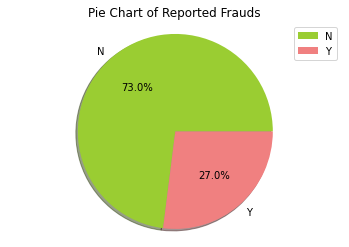

In [35]:
mc = Train_data["ReportedFraud"].value_counts()
l = ['N', 'Y']
c = ['yellowgreen', 'lightcoral']
plt.pie(mc, labels = l, colors= c, autopct='%1.1f%%', shadow = True)
plt.title('Pie Chart of Reported Frauds')
plt.axis('equal')
plt.legend()
plt.show()

__Observation:__
- 73% of the reported data is not a fraud.
- 27% of the data reported is a fraud.

Analysing some of the columns.

In [36]:
n = ['InsuredGender', 'InsuredEducationLevel', 'InsurancePolicyState', 'TypeOfIncident', 'TypeOfCollission', 
     'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 'IncidentCity', 'NumberOfVehicles', 
     'BodilyInjuries', 'Witnesses', 'PoliceReport', 'InsuredRelationship', 'IncidentMonth']

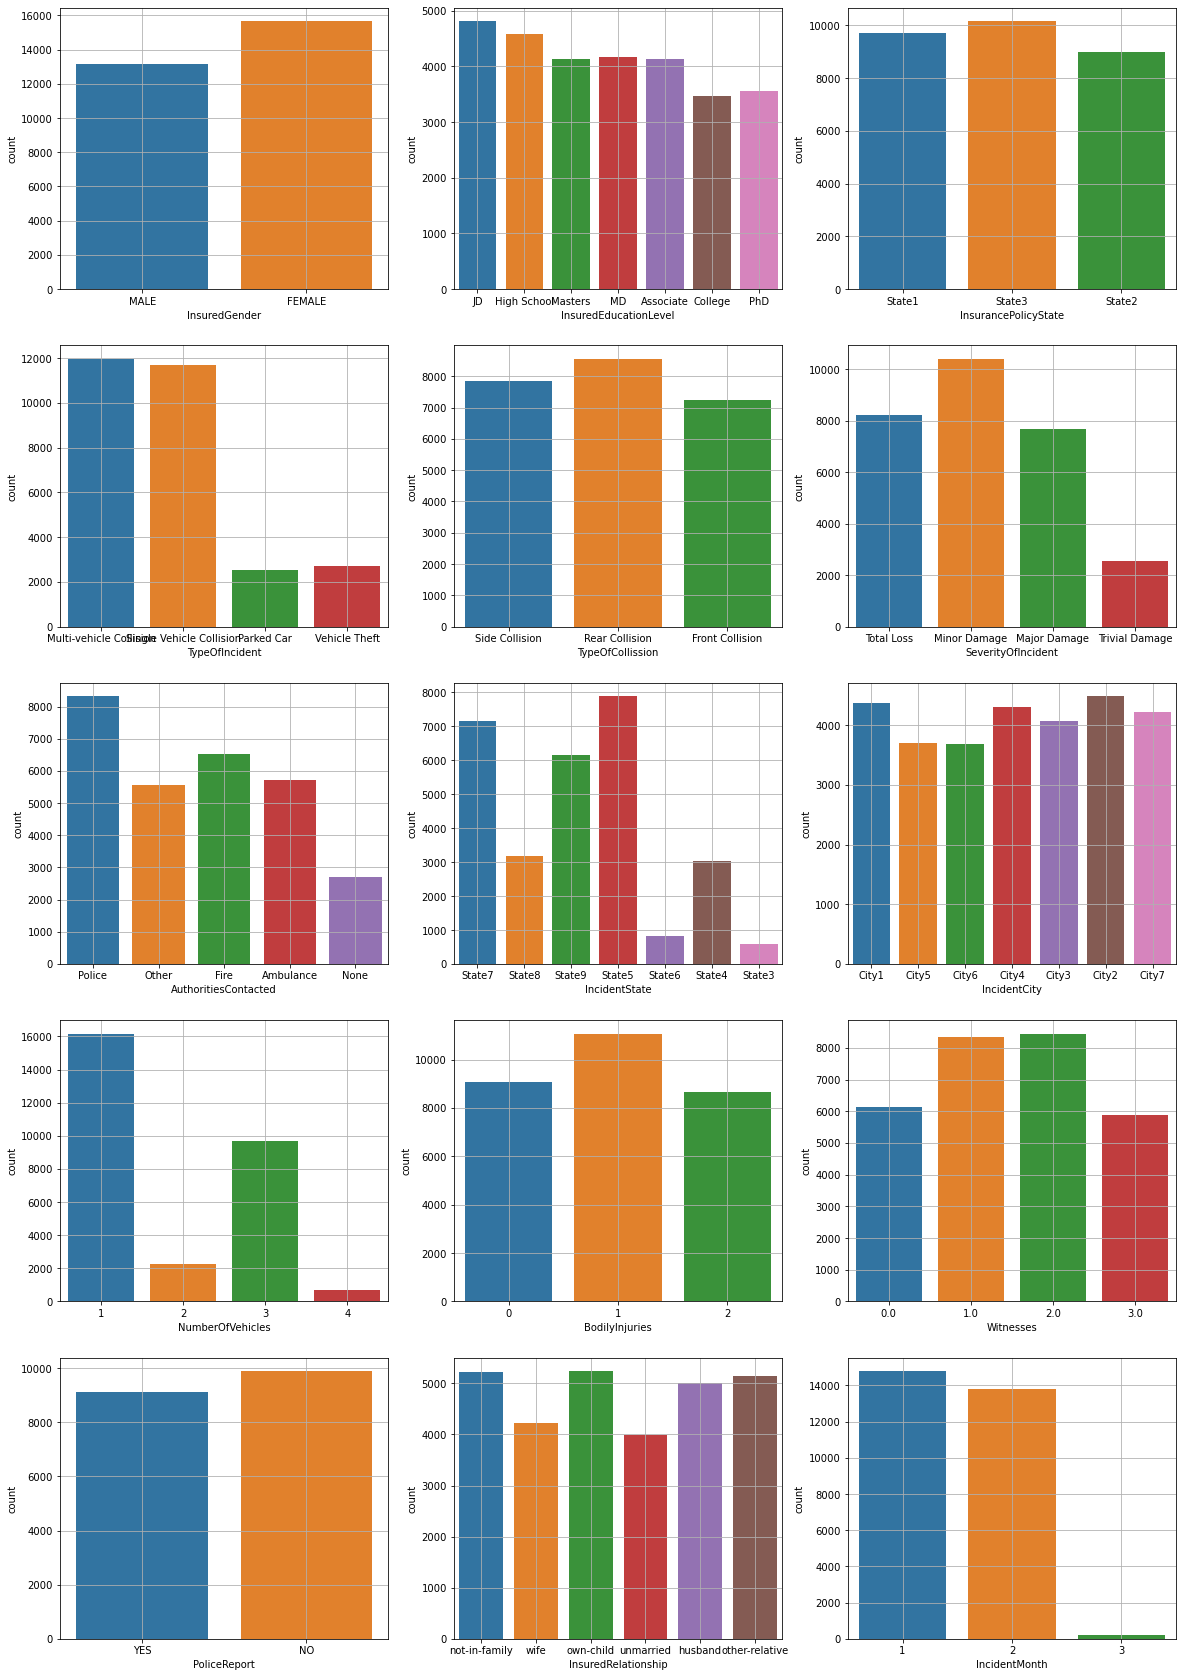

In [37]:
# countplots of some of the features

plotnumber = 1
plt.figure(figsize = (20,30))
for col in n:
    plt.subplot(5, 3, plotnumber)
    sns.countplot(col, data = Train_data)
    plotnumber += 1
    plt.grid(True)
plt.show()

__Observations:__
- The numer of people insured consists of more females than males.
- People having JD and High school as their highest education form the bigger chunk of the data. Whereas there are about equal number of people having education level of Masters, MD and Associate.
- State 3 accounts for the highest amount of data followed by state 1 and state 2 respectively.
- There is a significantly higher count of multi-vehicle and single-vehicle collisions over those of parked cars or vehicle thefts.
- Rear collision seems to be the most common type of collission followed by side and front collitions.
- Most incidents reported have minor damage or have total loss followed by major damage.
- Only a small chunk of the people  choose to not contact authorities, whereas most others contact some form of authority. The most common contact made is to the police.
- State 5 and state 7 account for most of the incidents. While most cities on an average report around the same amount og incidents.
- The number of vehicles involved is generally 1 or 3, in very rare cases it is 2 or 4.
- We see that more than half of the people do not file a police report.
- Out of the three months in which incidents have been reported, most have occured in the first two.

We now analyse the reported frauds with respect to some of the columns to gain some insights on the data.

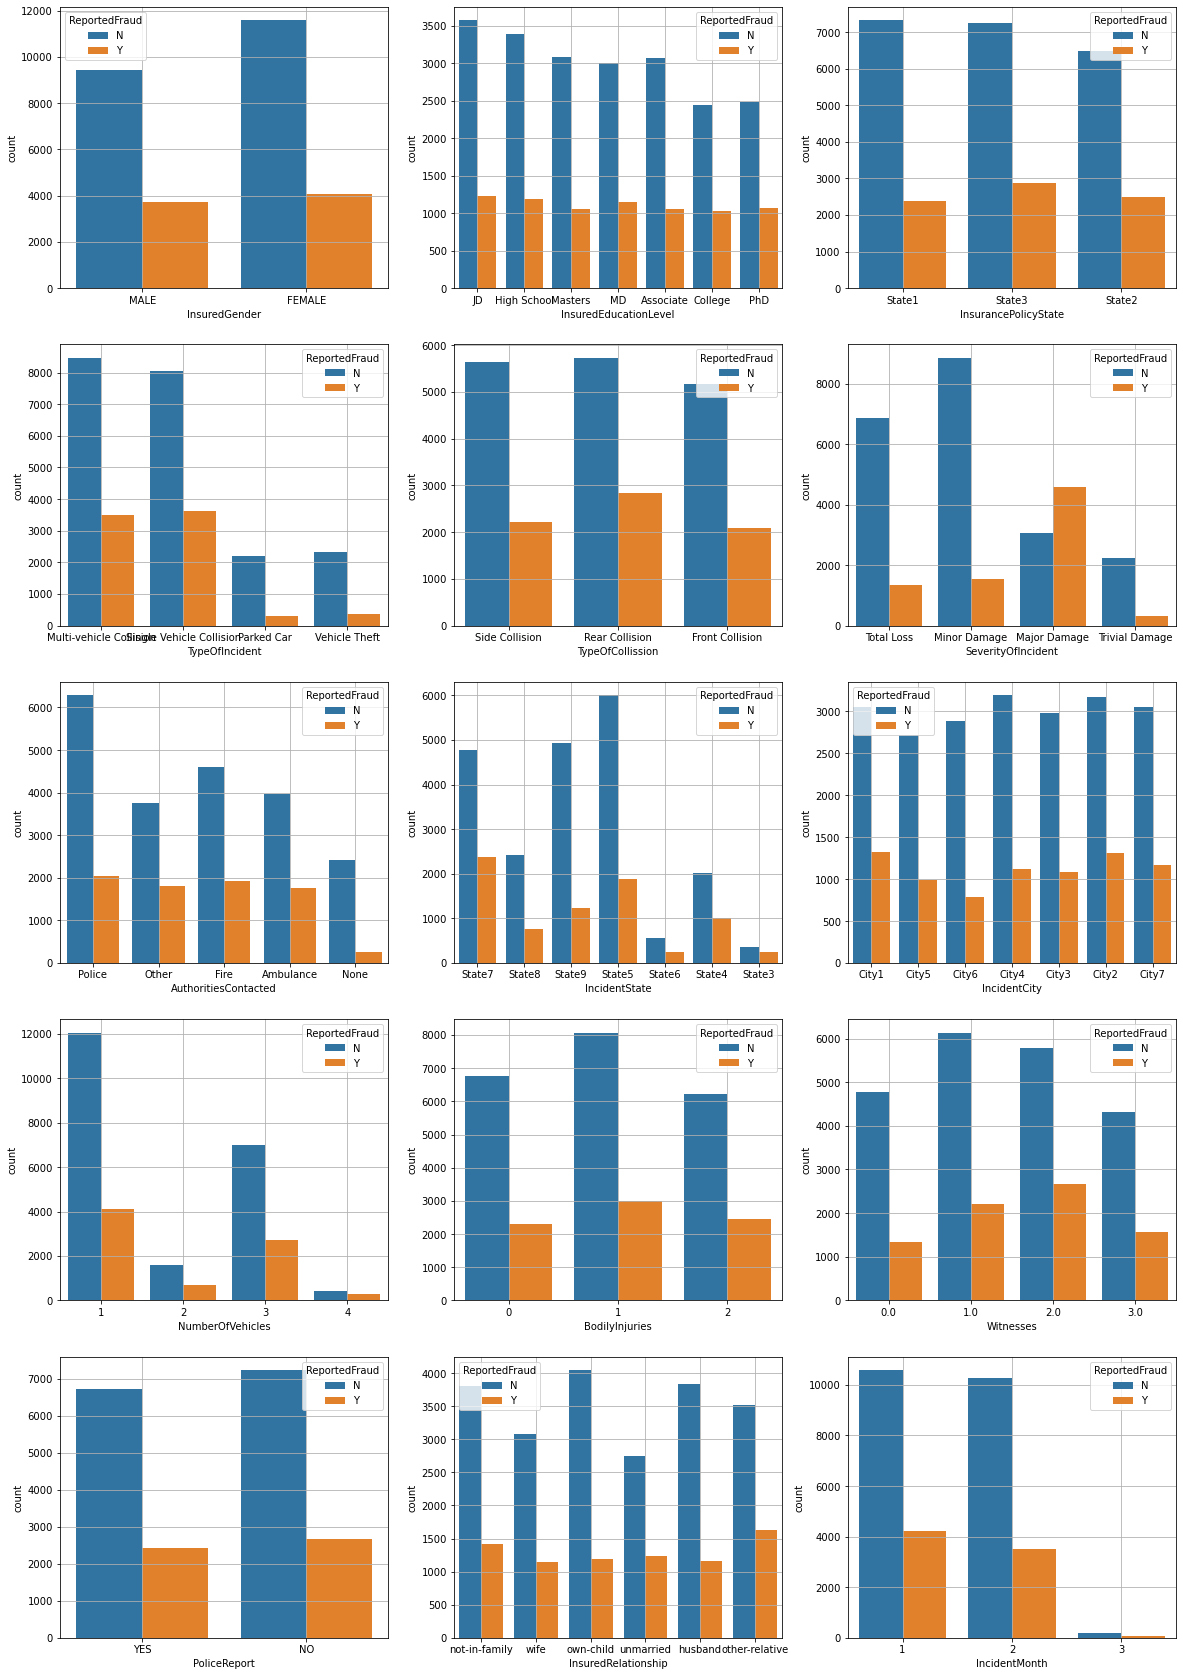

In [38]:
plotnumber = 1
plt.figure(figsize = (20,30))
for col in n:
    plt.subplot(5, 3, plotnumber)
    sns.countplot(col, data = Train_data, hue = 'ReportedFraud')
    plotnumber += 1
    plt.grid(True)
plt.show()

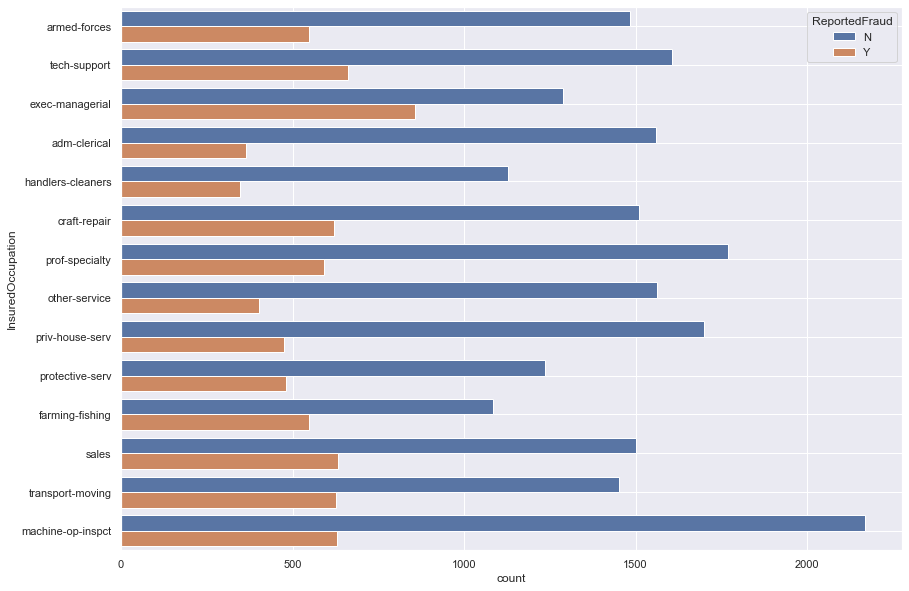

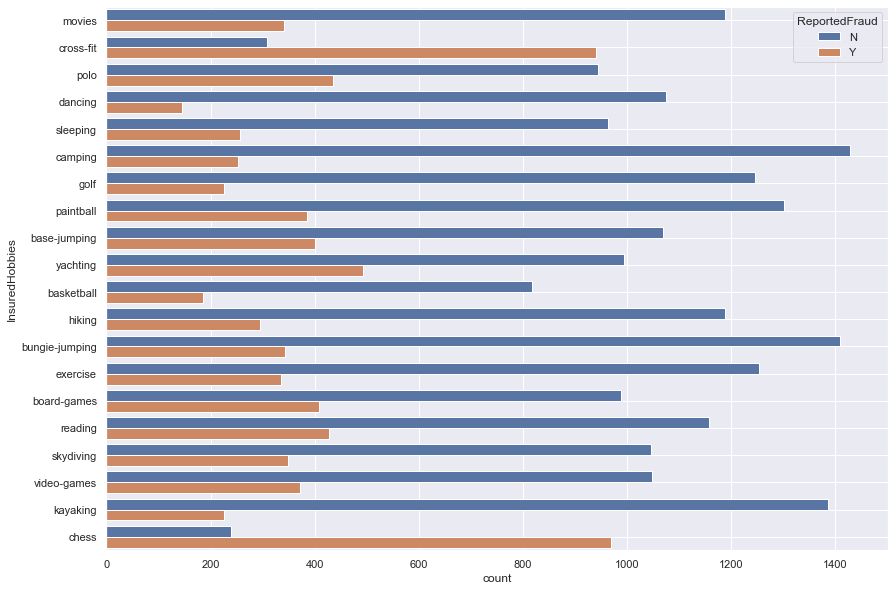

In [39]:
sns.set(rc = {'figure.figsize': (14, 10)})
sns.countplot(y = 'InsuredOccupation', data = Train_data, hue = 'ReportedFraud')
plt.grid(True)
plt.show()
sns.countplot(y = 'InsuredHobbies', data = Train_data, hue = 'ReportedFraud')
plt.grid(True)
plt.show()

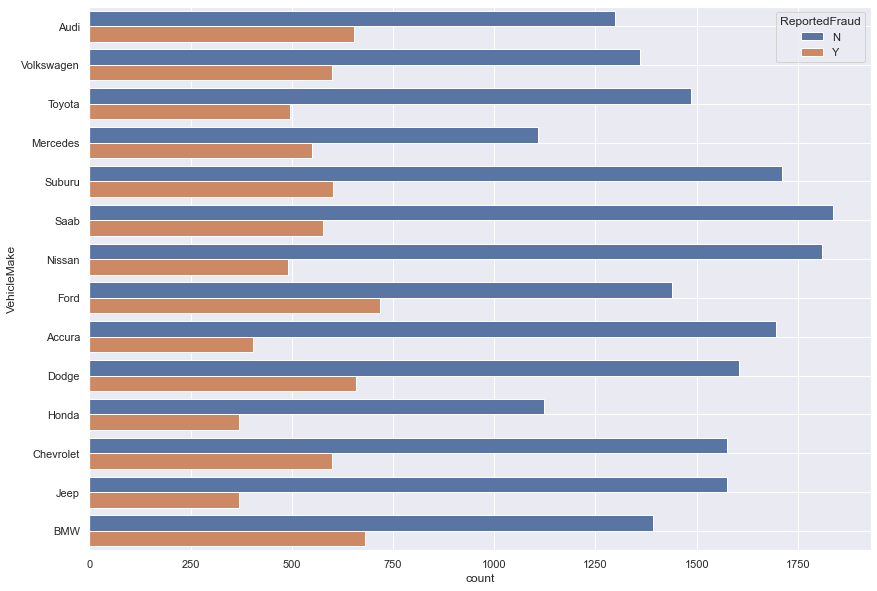

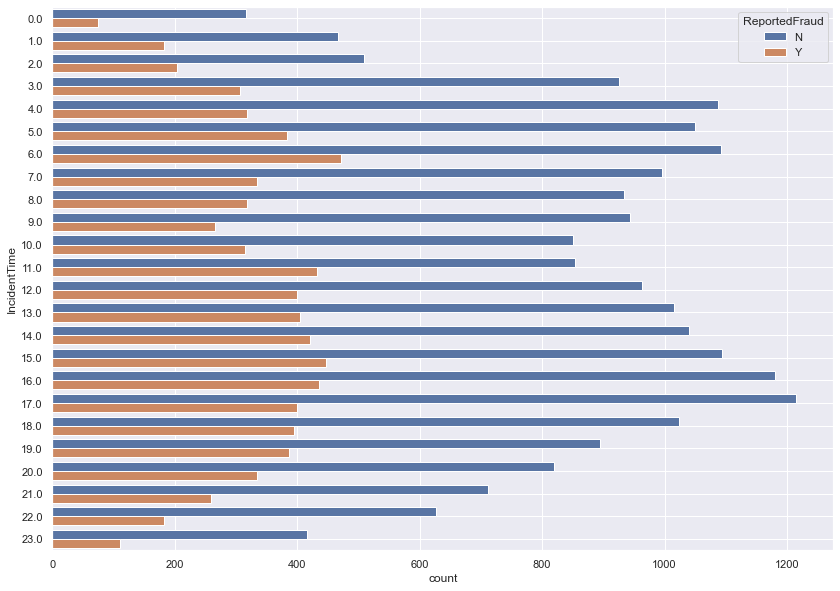

In [40]:
sns.countplot(y = 'VehicleMake', data = Train_data, hue = 'ReportedFraud')
plt.grid(True)
plt.show()
sns.countplot(y = 'IncidentTime', data = Train_data, hue = 'ReportedFraud')
plt.grid(True)
plt.show()

__Observations:__
- Gender, authorities contacted and education level seems to not affect the reported fraud claims.
- State 2 has the highest reported fraud claims followed by state 2 and state 1.
- There is a significant more fraud claims made by multi-vehicle and single-vehicle collisions compared to parked car collisions or vehicle thefts.
- Rear collitions have the highest reported fraud claims.
- Although major damage comes in third in the number of claims it has a significantly higher count in the number of fraud claims.
- State 7 and state 2 report the highest number of fraud claims. While city 1 and 2 report the most in cities followed by 7, 5 and 3.
- Incidents reported with 1 or 3 vehivles have the highest fraud claims.
- Most fraud claims have 2 or 1 witnesses.
- Most fraud claims made seem to report the relation as other_relative or not-in-family.
- People having hobbies as chess or cross-fit seem to be reporting significantly higher number of fraud claims

### EDA on Training Data

In [41]:
# obtaining column names present in the dataset
print('The columns of the Train_data are \n',  Train_data.columns)

The columns of the Train_data are 
 Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'InsurancePolicyState', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'SplitLimit', 'CombinedSingleLimit', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'IncidentTime',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfTotalClaim', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'IncidentMonth',
       'VehicleMake', 'VehicleID', 'VehicleModel', 'VehicleYOM',
       'ReportedFraud', 'VehicleAge', 'PolicyAge'],
      dtype='object')


In [42]:
# statistical summary of the data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.000,38.00,44.00,64.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.000,0.00,49000.00,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.000,0.00,0.00,0.00
InsurancePolicyNumber,28836.0,129312.517097,1.111406e+04,110122.00,119698.750,129278.50,138933.25,148619.00
CustomerLoyaltyPeriod,28836.0,203.067867,9.993295e+01,1.00,126.000,199.00,267.00,479.00
Policy_Deductible,28836.0,1114.282529,5.466328e+02,500.00,622.000,1000.00,1627.00,2000.00
PolicyAnnualPremium,28695.0,1261.702646,2.053852e+02,436.28,1124.425,1266.44,1397.20,2047.59
UmbrellaLimit,28836.0,983668.034436,1.969282e+06,-1000000.00,0.000,0.00,485961.00,10000000.00
SplitLimit,28836.0,274.488487,1.613607e+02,100.00,100.000,250.00,500.00,500.00
CombinedSingleLimit,28836.0,583.631572,2.882590e+02,300.00,300.000,500.00,1000.00,1000.00


In [43]:
# Correlation marix
Train_correlation = Train_data.corr()
Train_correlation

,InsuredAge,CapitalGains,CapitalLoss,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SplitLimit,CombinedSingleLimit,...,NumberOfVehicles,BodilyInjuries,Witnesses,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,IncidentMonth,VehicleAge,PolicyAge
InsuredAge,1.000000,-0.010798,0.017760,0.000055,0.933219,0.050991,0.037684,-0.002061,0.000317,-0.003457,...,0.021664,-0.027791,0.059672,0.070825,0.083090,0.075157,0.060257,-0.050120,0.002640,0.053097
CapitalGains,-0.010798,1.000000,-0.050029,0.002451,0.002118,0.019947,-0.009189,-0.044781,0.007526,0.008188,...,0.057967,0.055576,-0.017106,0.012434,0.009078,0.003841,0.014067,-0.016965,-0.027880,-0.042231
CapitalLoss,0.017760,-0.050029,1.000000,0.010248,0.022769,-0.035179,0.012281,-0.025335,-0.036676,-0.035701,...,-0.002662,-0.029415,-0.041328,-0.013989,-0.028032,-0.018501,-0.008068,0.016244,0.064341,0.048685
InsurancePolicyNumber,0.000055,0.002451,0.010248,1.000000,-0.006560,-0.007277,0.015426,-0.037251,0.017747,0.021712,...,-0.028060,-0.023945,-0.028928,-0.103587,-0.055687,-0.093827,-0.108726,0.006768,-0.003667,-0.002532
CustomerLoyaltyPeriod,0.933219,0.002118,0.022769,-0.006560,1.000000,0.052474,0.026015,-0.001315,-0.010687,-0.015059,...,0.015138,-0.021662,0.066705,0.065398,0.073378,0.055100,0.060027,-0.055336,0.005558,0.054206
Policy_Deductible,0.050991,0.019947,-0.035179,-0.007277,0.052474,1.000000,-0.013199,0.005480,0.004525,0.002858,...,0.042381,-0.031498,0.084758,0.027231,0.038940,0.071897,0.011136,-0.034101,-0.021135,0.059315
PolicyAnnualPremium,0.037684,-0.009189,0.012281,0.015426,0.026015,-0.013199,1.000000,-0.010985,0.009712,0.012542,...,-0.060560,-0.001689,0.007071,-0.004400,-0.020520,-0.015214,0.003336,-0.030288,0.032977,-0.003885
UmbrellaLimit,-0.002061,-0.044781,-0.025335,-0.037251,-0.001315,0.005480,-0.010985,1.000000,0.019190,0.013957,...,-0.025024,0.039018,0.004886,-0.038132,-0.047432,-0.016722,-0.037245,-0.000487,-0.006808,-0.045386
SplitLimit,0.000317,0.007526,-0.036676,0.017747,-0.010687,0.004525,0.009712,0.019190,1.000000,0.708696,...,-0.031842,-0.002810,0.078050,-0.047933,-0.064414,-0.038616,-0.041622,-0.037359,0.052424,0.024471
CombinedSingleLimit,-0.003457,0.008188,-0.035701,0.021712,-0.015059,0.002858,0.012542,0.013957,0.708696,1.000000,...,-0.033173,0.003678,0.072936,-0.048523,-0.062641,-0.038246,-0.042803,-0.040698,0.042889,0.027325


<AxesSubplot:>

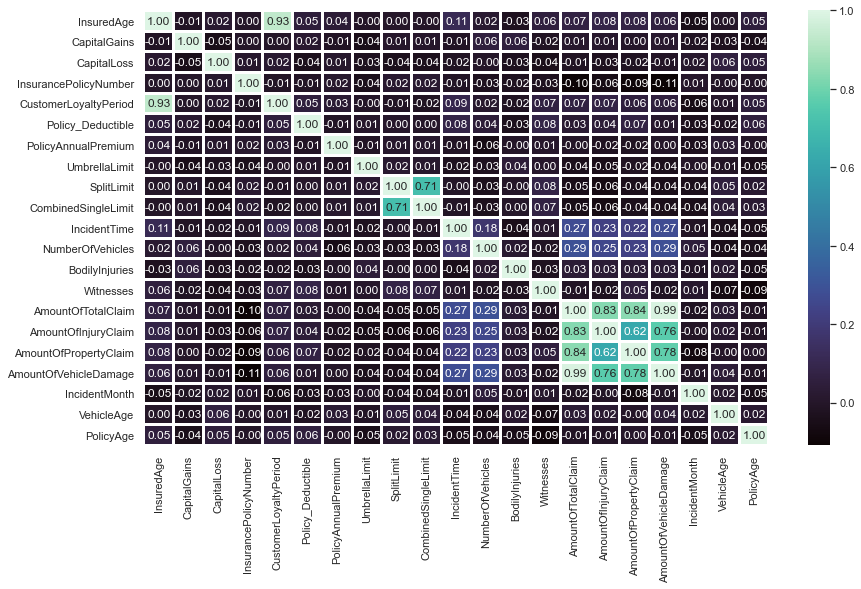

In [44]:
sns.set(rc = {'figure.figsize': (14, 8)})
sns.heatmap(Train_correlation, annot = True, fmt = '.2f', linewidths = 2, cmap = 'mako')

__Observations:__
- InsuredAge and CustomerLoyaltyPeriod are highly correlated
- Amount of vehicle damage is also highly correlated to amount of injury claim and amount og property claim

Scatter plot for the highly correlated columns.

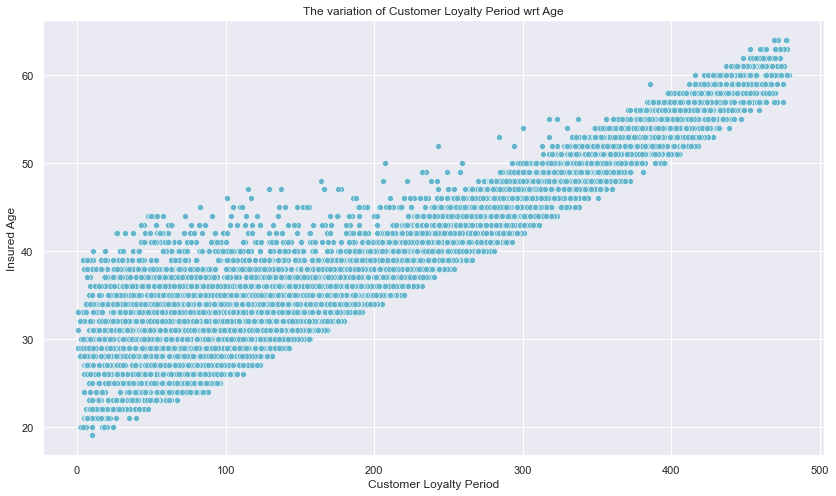

In [172]:
sns.scatterplot(x = Train_data['CustomerLoyaltyPeriod'], 
                y = Train_data['InsuredAge'], 
                data = Train_data,
                color = 'c')
plt.xlabel('Customer Loyalty Period')
plt.ylabel('Insured Age')
plt.title('The variation of Customer Loyalty Period wrt Age')
plt.show()

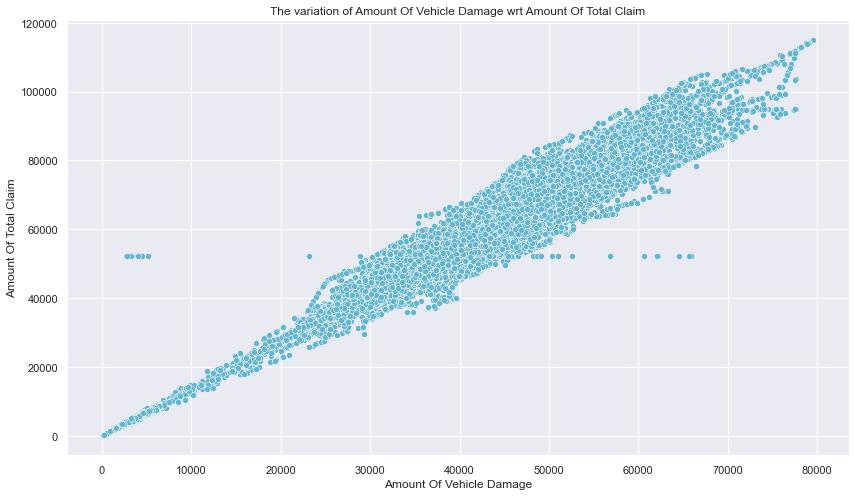

In [175]:
sns.scatterplot(x = Train_data['AmountOfVehicleDamage'], 
                y = Train_data['AmountOfTotalClaim'], 
                data = Train_data,
                color = 'c')
plt.xlabel('Amount Of Vehicle Damage')
plt.ylabel('Amount Of Total Claim')
plt.title('The variation of Amount Of Vehicle Damage wrt Amount Of Total Claim')
plt.show()

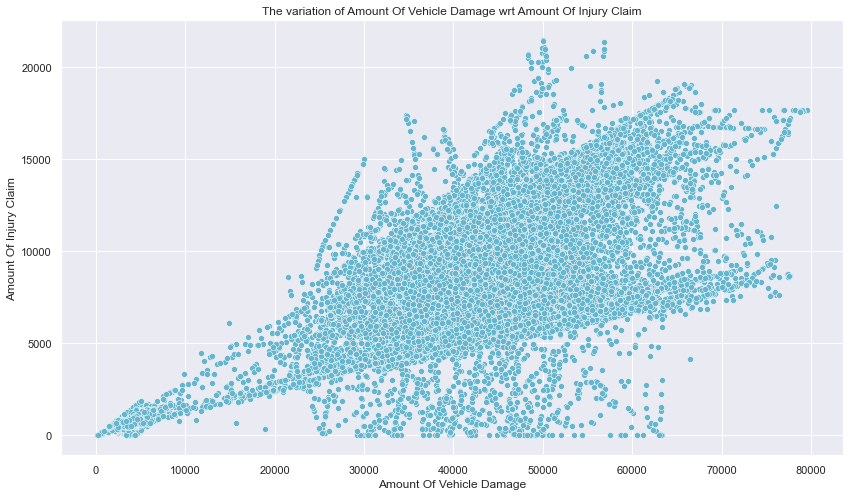

In [173]:
sns.scatterplot(x = Train_data['AmountOfVehicleDamage'], 
                y = Train_data['AmountOfInjuryClaim'], 
                data = Train_data, 
                color = 'c')
plt.xlabel('Amount Of Vehicle Damage')
plt.ylabel('Amount Of Injury Claim')
plt.title('The variation of Amount Of Vehicle Damage wrt Amount Of Injury Claim')
plt.show()

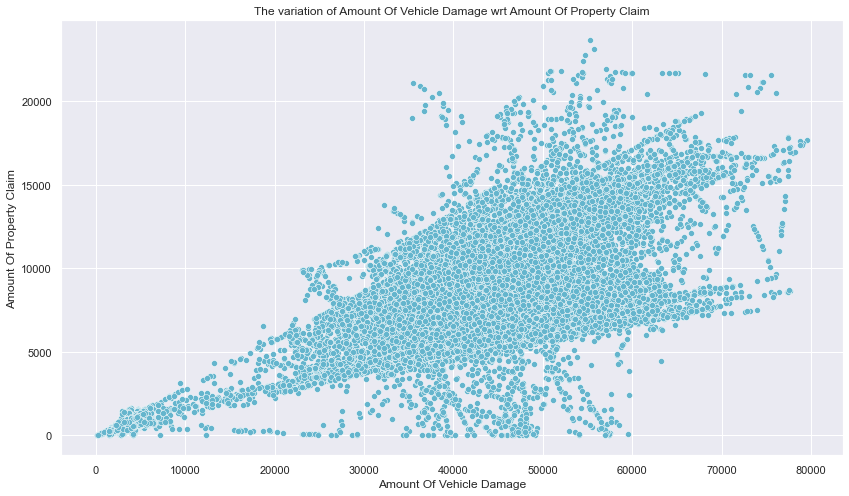

In [170]:
sns.scatterplot(x = Train_data['AmountOfVehicleDamage'],
                y = Train_data['AmountOfPropertyClaim'], 
                data = Train_data, 
                color = 'c')
plt.xlabel('Amount Of Vehicle Damage')
plt.ylabel('Amount Of Property Claim')
plt.title('The variation of Amount Of Vehicle Damage wrt Amount Of Property Claim')
plt.show()

__Checking for Outliers__

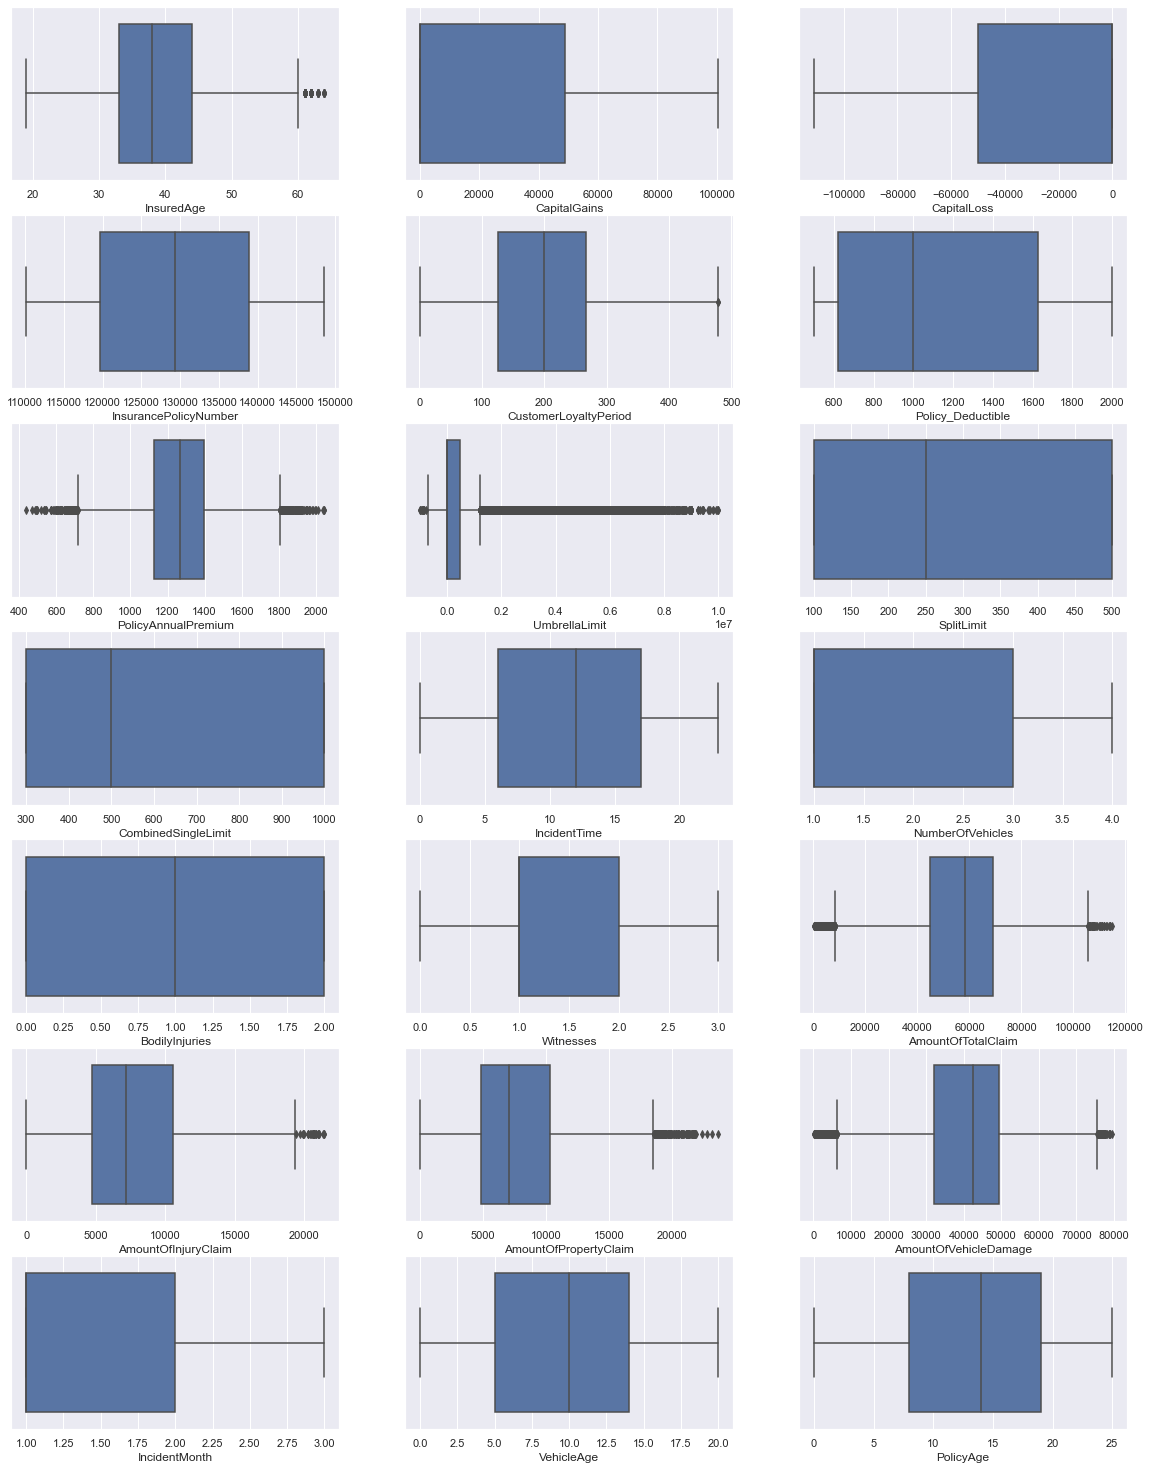

In [48]:
plotnumber = 1
plt.figure(figsize = (20,30))
for col in Train_data.select_dtypes(include=['float64','int64']).columns:
    plt.subplot(8, 3, plotnumber)
    sns.boxplot(Train_data[col])
    plotnumber += 1
plt.show()

### Missing Value treatment

Checking for missing values in the train data.

In [49]:
for i in range(0,len(Train_data.columns)):
    print('The number of missing values in the column', Train_data.columns[i], 'are',
          Train_data.isnull().sum()[i], '(', Train_data.isnull().sum()[i]*100/len(Train_data),'% )')    
print('\n The total number of missing values in the data set is',Train_data.isnull().sum().sum())

The number of missing values in the column CustomerID are 0 ( 0.0 %)
The number of missing values in the column InsuredAge are 0 ( 0.0 %)
The number of missing values in the column InsuredZipCode are 0 ( 0.0 %)
The number of missing values in the column InsuredGender are 30 ( 0.10403662089055347 %)
The number of missing values in the column InsuredEducationLevel are 0 ( 0.0 %)
The number of missing values in the column InsuredOccupation are 0 ( 0.0 %)
The number of missing values in the column InsuredHobbies are 0 ( 0.0 %)
The number of missing values in the column CapitalGains are 0 ( 0.0 %)
The number of missing values in the column CapitalLoss are 0 ( 0.0 %)
The number of missing values in the column Country are 2 ( 0.006935774726036899 %)
The number of missing values in the column InsurancePolicyNumber are 0 ( 0.0 %)
The number of missing values in the column CustomerLoyaltyPeriod are 0 ( 0.0 %)
The number of missing values in the column InsurancePolicyState are 0 ( 0.0 %)
The numb

<AxesSubplot:xlabel='Witnesses', ylabel='Count'>

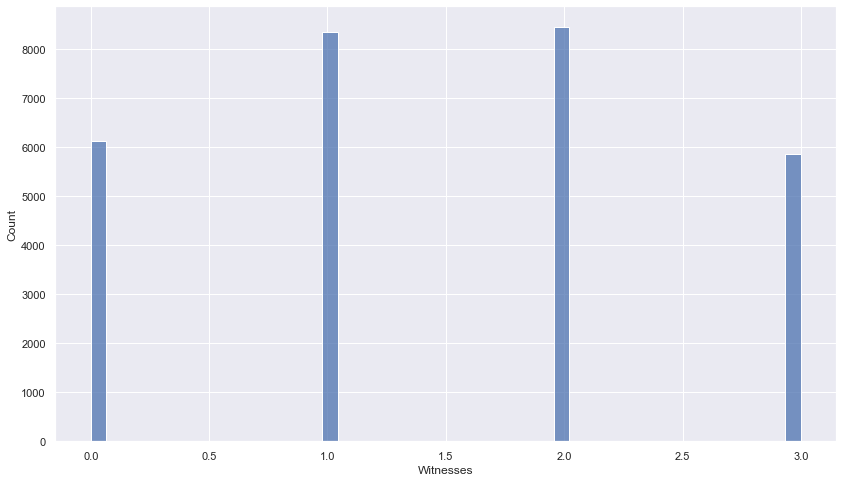

In [50]:
sns.histplot(Train_data["Witnesses"])

<AxesSubplot:xlabel='IncidentTime', ylabel='Count'>

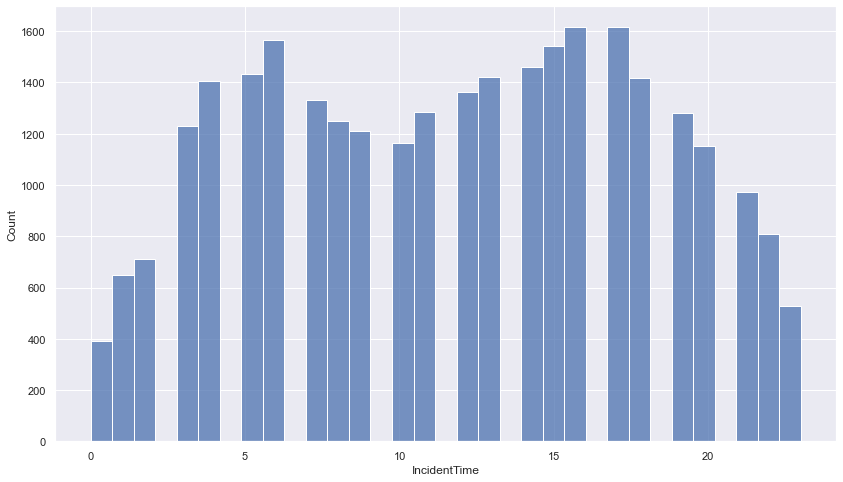

In [51]:
sns.histplot(Train_data["IncidentTime"])

<AxesSubplot:xlabel='PolicyAnnualPremium', ylabel='Count'>

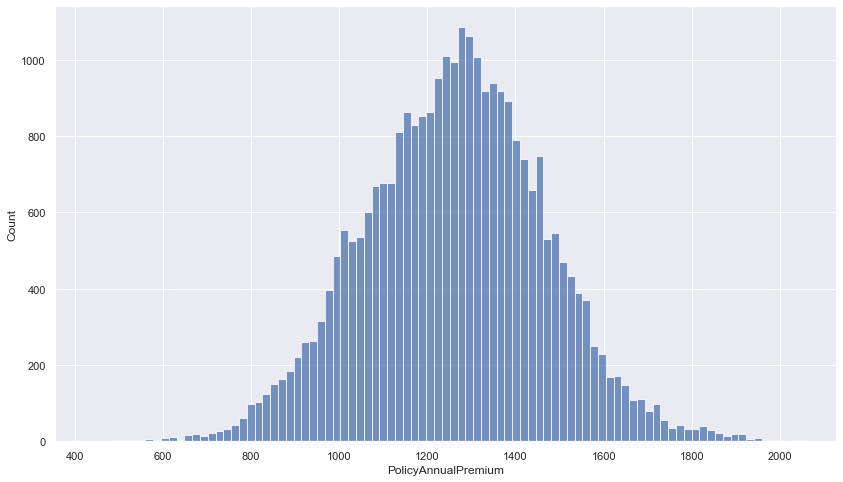

In [52]:
sns.histplot(Train_data["PolicyAnnualPremium"])

<AxesSubplot:xlabel='AmountOfTotalClaim', ylabel='Count'>

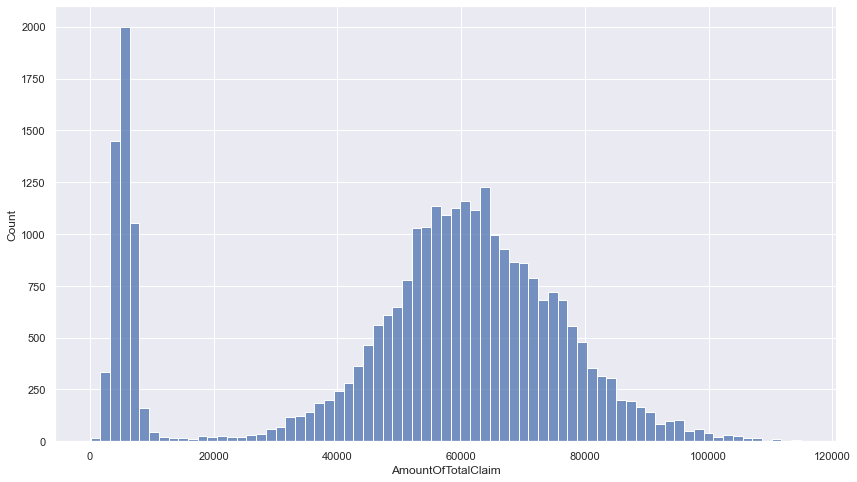

In [165]:
sns.histplot(Train_data["AmountOfTotalClaim"])

In [53]:
import math
# Replacing with the known
# Since we know the data is taken from India, the two missing values in Country can be replaced with India
Train_data["Country"].fillna("India", inplace = True)

# Replacing with unknown
# These features may play a role in determining the fraud nature of the report
# The following features have a significant amount of missing data and hence we replace the missing data with Unknown

Train_data["PropertyDamage"].fillna("Unknown", inplace = True)
Train_data["PoliceReport"].fillna("Unknown", inplace = True)
Train_data["TypeOfCollission"].fillna("Unknown", inplace = True)


# Reaplacing with mode
# We use mode imputation for gender as only an insignificant amount of data is missing
Train_data["VehicleMake"].fillna('Saab', inplace = True)
Train_data["InsuredGender"].fillna('FEMALE', inplace = True)

# Replacing with mean/median
Train_data["Witnesses"].fillna(Train_data["Witnesses"].mean(), inplace = True)
Train_data["IncidentTime"].fillna(math.ceil(Train_data["IncidentTime"].median()), inplace = True)
Train_data["PolicyAnnualPremium"].fillna(Train_data["PolicyAnnualPremium"].mean(), inplace = True)
Train_data["AmountOfTotalClaim"].fillna(Train_data["AmountOfTotalClaim"].mean(), inplace = True)

In [54]:
print('\n The total number of missing values in the data set is',Train_data.isnull().sum().sum())


 The total number of missing values in the data set is 0


### Dropping columns that are not required

In [55]:
for c in Train_data.columns:
    print('The number of unique values in {} is {}'.format(c, Train_data[c].nunique()))

The number of unique values in CustomerID is 28836
The number of unique values in InsuredAge is 46
The number of unique values in InsuredZipCode is 995
The number of unique values in InsuredGender is 2
The number of unique values in InsuredEducationLevel is 7
The number of unique values in InsuredOccupation is 14
The number of unique values in InsuredHobbies is 20
The number of unique values in CapitalGains is 338
The number of unique values in CapitalLoss is 354
The number of unique values in Country is 1
The number of unique values in InsurancePolicyNumber is 28836
The number of unique values in CustomerLoyaltyPeriod is 479
The number of unique values in InsurancePolicyState is 3
The number of unique values in Policy_Deductible is 1496
The number of unique values in PolicyAnnualPremium is 23852
The number of unique values in UmbrellaLimit is 7089
The number of unique values in InsuredRelationship is 6
The number of unique values in SplitLimit is 3
The number of unique values in Combi

__Reasons for dropping columns:__
- The number of unique values in the columns CustomerID', VehicleID and InsurancePolicyNumber of the test dataset are 28836 which is the same as the number of datapoints in the column, hence we do not require the column and drop it. 
- IncidentYear has only one value of 2015 and Country also has only one value 'India', hence we drop them
- The rest of the columns in the test data set need not be dropped

In [56]:
Train_data.drop(['CustomerID', 'VehicleID', 'InsurancePolicyNumber', 'Country'], 
                inplace = True, axis = 1)
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InsuredAge             28836 non-null  int64  
 1   InsuredZipCode         28836 non-null  object 
 2   InsuredGender          28836 non-null  object 
 3   InsuredEducationLevel  28836 non-null  object 
 4   InsuredOccupation      28836 non-null  object 
 5   InsuredHobbies         28836 non-null  object 
 6   CapitalGains           28836 non-null  int64  
 7   CapitalLoss            28836 non-null  int64  
 8   CustomerLoyaltyPeriod  28836 non-null  int64  
 9   InsurancePolicyState   28836 non-null  object 
 10  Policy_Deductible      28836 non-null  int64  
 11  PolicyAnnualPremium    28836 non-null  float64
 12  UmbrellaLimit          28836 non-null  int64  
 13  InsuredRelationship    28836 non-null  object 
 14  SplitLimit             28836 non-null  int64  
 15  Co

Both Education level and Severity of incident, although categorical, have an order to the data. Hence we use ordinal encoder to depict this order.

In [58]:
# using ordinal encoder for ordinal data
edu_order = ['High School','Associate','College','Masters','JD','MD','PhD']
oe_edu = OrdinalEncoder(categories = [edu_order])
edu = oe_edu.fit_transform(Train_data['InsuredEducationLevel'].values.reshape(-1,1))
Train_data['InsuredEducationLevel'] = edu.astype('int64') 

sev_order = ['Trivial Damage','Minor Damage','Major Damage','Total Loss']
oe_sev = OrdinalEncoder(categories = [sev_order])
sev = oe_sev.fit_transform(Train_data['SeverityOfIncident'].values.reshape(-1,1))
Train_data['SeverityOfIncident'] = sev.astype('int64') 

Train_data.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,...,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,IncidentMonth,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud,VehicleAge,PolicyAge
0,35,454776,MALE,4,armed-forces,movies,56700,-48500,49,State1,...,13417,6071,46013,2,Audi,A5,2008,N,7,17
1,36,454776,MALE,4,tech-support,cross-fit,70600,-48500,114,State1,...,15560,5919,39903,2,Audi,A5,2006,N,9,15
2,33,603260,MALE,4,armed-forces,polo,66400,-63700,167,State3,...,11630,11630,43495,1,Volkswagen,Jetta,1999,N,16,14
3,36,474848,MALE,4,armed-forces,polo,47900,-73400,190,State2,...,12003,12003,42237,1,Volkswagen,Jetta,2003,N,12,10
4,29,457942,FEMALE,0,exec-managerial,dancing,0,-41500,115,State2,...,8829,7234,37481,1,Toyota,CRV,2010,N,5,19


## Reading the test data and applying the preprocessing steps

In [135]:
print('Test Demographic Data \n')

Test_Demographics_data = pd.read_csv('Test_Demographics.csv', na_values = ['NA'])

# counting the number of rows and columns 
print('The shape of the Test_Demographics file is ',  Test_Demographics_data.shape, 'i.e., the file consists of', 
      Test_Demographics_data.shape[1], 'columns and', Test_Demographics_data.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Test_Demographics_data.head())

# veiwing the last five rows of the datasets
display(Test_Demographics_data.tail())

Test Demographic Data 

The shape of the Test_Demographics file is  (8912, 10) i.e., the file consists of 10 columns and 8912 rows


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India
8911,Cust9998,38,450730,FEMALE,PhD,handlers-cleaners,video-games,51500,-74300,India


In [136]:
Test_Demographics_data['InsuredZipCode'] = Test_Demographics_data['InsuredZipCode'].astype('object')
Test_Demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             8912 non-null   object
 1   InsuredAge             8912 non-null   int64 
 2   InsuredZipCode         8912 non-null   object
 3   InsuredGender          8904 non-null   object
 4   InsuredEducationLevel  8912 non-null   object
 5   InsuredOccupation      8912 non-null   object
 6   InsuredHobbies         8912 non-null   object
 7   CapitalGains           8912 non-null   int64 
 8   CapitalLoss            8912 non-null   int64 
 9   Country                8908 non-null   object
dtypes: int64(3), object(7)
memory usage: 696.4+ KB


In [137]:
print('Test Policy Information \n')

Test_Policy_information = pd.read_csv('Test_Policy.csv', na_values = ['-1', 'MISSINGVAL', 'NA'])

# counting the number of rows and columns 
print('The shape of the Test_Policy file is ',  Test_Policy_information.shape, 'i.e., the file consists of', 
      Test_Policy_information.shape[1], 'columns and', Test_Policy_information.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Test_Policy_information.head())

# veiwing the last five rows of the datasets
display(Test_Policy_information.tail())

Test Policy Information 

The shape of the Test_Policy file is  (8912, 10) i.e., the file consists of 10 columns and 8912 rows


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
8907,148598,155,2000-03-19,State3,250/500,616,1358.80,3462442,other-relative,Cust39477
8908,148599,215,1993-07-23,State3,250/500,892,1299.82,4567362,other-relative,Cust39478
8909,148609,245,2009-12-11,State1,500/1000,1002,1361.44,9580,wife,Cust39488
8910,148610,437,2011-11-17,State1,500/1000,1902,1357.36,4510498,wife,Cust39489
8911,148617,200,1995-12-04,State3,250/500,1000,895.49,0,husband,Cust39496


In [138]:
Test_Policy_information[['SplitLimit','CombinedSingleLimit']] = Test_Policy_information['Policy_CombinedSingleLimit'].str.split("/", expand = True)
Test_Policy_information.drop('Policy_CombinedSingleLimit', axis = 1, inplace = True)
Test_Policy_information['SplitLimit'] = Test_Policy_information['SplitLimit'].astype('int64')
Test_Policy_information['CombinedSingleLimit'] = Test_Policy_information['CombinedSingleLimit'].astype('int64')

Test_Policy_information['DateOfPolicyCoverage'] = pd.to_datetime(Test_Policy_information['DateOfPolicyCoverage'], format='%Y-%m-%d')
Test_Policy_information['DayOfPolicyCoverage'] = Test_Policy_information['DateOfPolicyCoverage'].dt.day
Test_Policy_information['MonthOfPolicyCoverage'] = Test_Policy_information['DateOfPolicyCoverage'].dt.month
Test_Policy_information['YearOfPolicyCoverage'] = Test_Policy_information['DateOfPolicyCoverage'].dt.year
Test_Policy_information.drop('DateOfPolicyCoverage', axis = 1, inplace = True)
Test_Policy_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InsurancePolicyNumber  8912 non-null   int64  
 1   CustomerLoyaltyPeriod  8912 non-null   int64  
 2   InsurancePolicyState   8912 non-null   object 
 3   Policy_Deductible      8912 non-null   int64  
 4   PolicyAnnualPremium    8865 non-null   float64
 5   UmbrellaLimit          8912 non-null   int64  
 6   InsuredRelationship    8912 non-null   object 
 7   CustomerID             8912 non-null   object 
 8   SplitLimit             8912 non-null   int64  
 9   CombinedSingleLimit    8912 non-null   int64  
 10  DayOfPolicyCoverage    8912 non-null   int64  
 11  MonthOfPolicyCoverage  8912 non-null   int64  
 12  YearOfPolicyCoverage   8912 non-null   int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 905.2+ KB


In [139]:
print('Test Claim Information \n')

Test_Claim_information = pd.read_csv('Test_Claim.csv', na_values = ['?', '-5',  'MISSINGVALUE', 'MISSEDDATA'])

# counting the number of rows and columns
print('The shape of the Test_Claim file is ',  Test_Claim_information.shape, 'i.e., the file consists of', 
      Test_Claim_information.shape[1], 'columns and', Test_Claim_information.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Test_Claim_information.head())

# veiwing the last five rows of the datasets
display(Test_Claim_information.tail())

Test Claim Information 

The shape of the Test_Claim file is  (8912, 19) i.e., the file consists of 19 columns and 8912 rows


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4.0,3,NO,0,0.0,NaN,68354.0,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16.0,1,NaN,1,1.0,NaN,55270.0,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20.0,3,NO,0,1.0,NaN,59515.0,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,NaN,Trivial Damage,None,State7,City5,Location 1449,10.0,1,NaN,2,1.0,NaN,4941.0,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7.0,3,NO,2,3.0,NO,34650.0,7700,3850,23100


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
8907,Cust9984,2015-01-17,Single Vehicle Collision,Rear Collision,Total Loss,Police,State5,City4,Location 1958,10.0,1,YES,1,0.0,NO,61296.0,5785,8861,46650
8908,Cust9986,2015-02-09,Single Vehicle Collision,Front Collision,Total Loss,Other,State5,City2,Location 1035,19.0,1,NaN,1,1.0,YES,86729.0,9698,9698,67333
8909,Cust9990,2015-02-20,Single Vehicle Collision,Rear Collision,Minor Damage,Other,State5,City2,Location 2037,9.0,1,YES,1,2.0,NO,65328.0,12455,9281,43592
8910,Cust9995,2015-02-22,Single Vehicle Collision,Side Collision,Minor Damage,Police,State8,City3,Location 2097,19.0,1,YES,0,2.0,YES,71118.0,11977,11604,47537
8911,Cust9998,2015-01-14,Single Vehicle Collision,Front Collision,Total Loss,Other,State7,City3,Location 1024,10.0,1,NaN,2,2.0,NaN,67499.0,11681,5841,49977


In [140]:
Test_Claim_information['DateOfIncident'] = pd.to_datetime(Test_Claim_information['DateOfIncident'], format='%Y-%m-%d')
Test_Claim_information['IncidentDay'] = Test_Claim_information['DateOfIncident'].dt.day
Test_Claim_information['IncidentMonth'] = Test_Claim_information['DateOfIncident'].dt.month
Test_Claim_information['IncidentYear'] = Test_Claim_information['DateOfIncident'].dt.year
Test_Claim_information.drop('DateOfIncident', axis = 1, inplace = True)
Test_Claim_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8912 entries, 0 to 8911
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             8912 non-null   object 
 1   TypeOfIncident         8912 non-null   object 
 2   TypeOfCollission       7149 non-null   object 
 3   SeverityOfIncident     8912 non-null   object 
 4   AuthoritiesContacted   8912 non-null   object 
 5   IncidentState          8912 non-null   object 
 6   IncidentCity           8912 non-null   object 
 7   IncidentAddress        8912 non-null   object 
 8   IncidentTime           8905 non-null   float64
 9   NumberOfVehicles       8912 non-null   int64  
 10  PropertyDamage         5713 non-null   object 
 11  BodilyInjuries         8912 non-null   int64  
 12  Witnesses              8900 non-null   float64
 13  PoliceReport           5898 non-null   object 
 14  AmountOfTotalClaim     8904 non-null   float64
 15  Amou

In [141]:
print('Test Data of Vehicle \n')

Test_Data_of_vehicle = pd.read_csv('Test_Vehicle.csv', na_values = ['???'])

# counting the number of rows and columns
print('The shape of the Train_Vehicle file is ',  Test_Data_of_vehicle.shape, 'i.e., the file consists of', 
      Test_Data_of_vehicle.shape[1], 'columns and', Test_Data_of_vehicle.shape[0], 'rows')

# veiwing the first five rows of the datasets
display(Test_Data_of_vehicle.head())

# veiwing the last five rows of the datasets
display(Test_Data_of_vehicle.tail())

Test Data of Vehicle 

The shape of the Train_Vehicle file is  (35648, 3) i.e., the file consists of 3 columns and 35648 rows


,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


,CustomerID,VehicleAttribute,VehicleAttributeDetails
35643,Cust1980,VehicleModel,95
35644,Cust17773,VehicleModel,Silverado
35645,Cust24313,VehicleID,Vehicle33407
35646,Cust5061,VehicleYOM,2003
35647,Cust13782,VehicleMake,Chevrolet


In [142]:
len(Test_Data_of_vehicle['CustomerID'].unique())

8912

In [143]:
Test_gr = Test_Data_of_vehicle.groupby(['VehicleAttribute'])

Test_a = Test_gr.get_group(('VehicleMake'))
Test_a.drop('VehicleAttribute', axis = 1, inplace = True)
Test_a.rename(columns = {'VehicleAttributeDetails':'VehicleMake'}, inplace = True)

Test_b = Test_gr.get_group(('VehicleID'))
Test_b.drop('VehicleAttribute', axis = 1, inplace = True)
Test_b.rename(columns = {'VehicleAttributeDetails':'VehicleID'}, inplace = True)

Test_c = Test_gr.get_group(('VehicleModel'))
Test_c.drop('VehicleAttribute', axis = 1, inplace = True)
Test_c.rename(columns = {'VehicleAttributeDetails':'VehicleModel'}, inplace = True)

Test_d = Test_gr.get_group(('VehicleYOM'))
Test_d.drop('VehicleAttribute', axis = 1, inplace = True)
Test_d.rename(columns = {'VehicleAttributeDetails':'VehicleYOM'}, inplace = True)

Test_Vehicle_data = Test_a.merge(Test_b, on = 'CustomerID').merge(Test_c, 
                                                                  on = 'CustomerID').merge(Test_d, on = 'CustomerID')
Test_Vehicle_data

,CustomerID,VehicleMake,VehicleID,VehicleModel,VehicleYOM
0,Cust33822,Volkswagen,Vehicle31490,Jetta,2007
1,Cust5135,Audi,Vehicle8167,A3,1998
2,Cust8266,BMW,Vehicle34951,M5,2002
3,Cust37142,Jeep,Vehicle2667,Wrangler,2008
4,Cust30447,Ford,Vehicle34705,Corolla,2003
...,...,...,...,...,...
8907,Cust8984,Volkswagen,Vehicle9315,Passat,2003
8908,Cust30476,Toyota,Vehicle7354,Corolla,1995
8909,Cust30878,Volkswagen,Vehicle6887,Malibu,2002
8910,Cust11488,Jeep,Vehicle25633,Wrangler,2009


In [144]:
Test_Vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    8912 non-null   object
 1   VehicleMake   8904 non-null   object
 2   VehicleID     8912 non-null   object
 3   VehicleModel  8912 non-null   object
 4   VehicleYOM    8912 non-null   object
dtypes: object(5)
memory usage: 417.8+ KB


In [145]:
Test_data = Test_Demographics_data.merge(Test_Policy_information, on = 'CustomerID').merge(Test_Claim_information, on = 'CustomerID').merge(Test_Vehicle_data, on = 'CustomerID')
Test_data

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,IncidentDay,IncidentMonth,IncidentYear,VehicleMake,VehicleID,VehicleModel,VehicleYOM
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,6835,8059,53460,5,2,2015,Volkswagen,Vehicle34362,Passat,1995
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,8113,5240,41917,13,1,2015,Nissan,Vehicle17046,Ultima,2006
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,7490,9110,42915,5,1,2015,Suburu,Vehicle11038,Impreza,2010
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,494,866,3581,3,1,2015,Accura,Vehicle37114,TL,2009
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,7700,3850,23100,22,2,2015,Dodge,Vehicle16771,RAM,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,...,5785,8861,46650,17,1,2015,Saab,Vehicle19062,95,2000
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,...,9698,9698,67333,9,2,2015,Saab,Vehicle18191,92x,2000
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,...,12455,9281,43592,20,2,2015,BMW,Vehicle11032,Civic,1998
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,...,11977,11604,47537,22,2,2015,Jeep,Vehicle30412,Grand Cherokee,2002


In [146]:
Test_data['VehicleAge'] = Test_data['IncidentYear'].apply(int) - Test_data['VehicleYOM'].apply(int)
Test_data['PolicyAge'] = Test_data['IncidentYear'].apply(int) - Test_data['YearOfPolicyCoverage'].apply(int)
Test_data.drop(['YearOfPolicyCoverage', 'DayOfPolicyCoverage', 'MonthOfPolicyCoverage', 
                 'IncidentDay', 'IncidentYear'], inplace = True, axis = 1)

In [147]:
Test_data.shape

(8912, 43)

In [148]:
for i in range(0,len(Test_data.columns)):
    print('The number of missing values in the column', Test_data.columns[i], 'are', Test_data.isnull().sum()[i])    
print('\n The total number of missing values in the data set is',Test_data.isnull().sum().sum())

The number of missing values in the column CustomerID are 0
The number of missing values in the column InsuredAge are 0
The number of missing values in the column InsuredZipCode are 0
The number of missing values in the column InsuredGender are 8
The number of missing values in the column InsuredEducationLevel are 0
The number of missing values in the column InsuredOccupation are 0
The number of missing values in the column InsuredHobbies are 0
The number of missing values in the column CapitalGains are 0
The number of missing values in the column CapitalLoss are 0
The number of missing values in the column Country are 4
The number of missing values in the column InsurancePolicyNumber are 0
The number of missing values in the column CustomerLoyaltyPeriod are 0
The number of missing values in the column InsurancePolicyState are 0
The number of missing values in the column Policy_Deductible are 0
The number of missing values in the column PolicyAnnualPremium are 47
The number of missing 

In [149]:
# Replacing with the known
Test_data["Country"].fillna("India", inplace = True)

# Replacing with unknown
Test_data["PropertyDamage"].fillna("Unknown", inplace = True)
Test_data["PoliceReport"].fillna("Unknown", inplace = True)
Test_data["TypeOfCollission"].fillna("Unknown", inplace = True)

# Repalacing with mode
Test_data["VehicleMake"].fillna('Saab', inplace = True)
Test_data["InsuredGender"].fillna('FEMALE', inplace = True)

# Replacing with train mean/median
Test_data["Witnesses"].fillna(Train_data["Witnesses"].mean(), inplace = True)
Test_data["IncidentTime"].fillna(Train_data["IncidentTime"].median(), inplace = True)
Test_data["PolicyAnnualPremium"].fillna(Train_data["PolicyAnnualPremium"].mean(), inplace = True)
Test_data["AmountOfTotalClaim"].fillna(Train_data["AmountOfTotalClaim"].mean(), inplace = True)

In [150]:
print('\n The total number of missing values in the data set is',Test_data.isnull().sum().sum())


 The total number of missing values in the data set is 0


In [151]:
Test_data.drop(['CustomerID', 'VehicleID', 'InsurancePolicyNumber', 'Country'], 
                inplace = True, axis = 1)
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InsuredAge             8912 non-null   int64  
 1   InsuredZipCode         8912 non-null   object 
 2   InsuredGender          8912 non-null   object 
 3   InsuredEducationLevel  8912 non-null   object 
 4   InsuredOccupation      8912 non-null   object 
 5   InsuredHobbies         8912 non-null   object 
 6   CapitalGains           8912 non-null   int64  
 7   CapitalLoss            8912 non-null   int64  
 8   CustomerLoyaltyPeriod  8912 non-null   int64  
 9   InsurancePolicyState   8912 non-null   object 
 10  Policy_Deductible      8912 non-null   int64  
 11  PolicyAnnualPremium    8912 non-null   float64
 12  UmbrellaLimit          8912 non-null   int64  
 13  InsuredRelationship    8912 non-null   object 
 14  SplitLimit             8912 non-null   int64  
 15  Comb

In [152]:
Test_data.shape

(8912, 39)

In [153]:
# using ordinal encoder for ordinal data
edu_order = ['High School','Associate','College','Masters','JD','MD','PhD']
oe_edu_test = OrdinalEncoder(categories = [edu_order])
edu_test = oe_edu_test.fit_transform(Test_data['InsuredEducationLevel'].values.reshape(-1,1))
Test_data['InsuredEducationLevel'] = edu_test.astype('int64') 

sev_order = ['Trivial Damage','Minor Damage','Major Damage','Total Loss']
oe_sev_test = OrdinalEncoder(categories = [sev_order])
sev_test = oe_sev_test.fit_transform(Test_data['SeverityOfIncident'].values.reshape(-1,1))
Test_data['SeverityOfIncident'] = sev_test.astype('int64') 

Test_data.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,InsurancePolicyState,...,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,IncidentMonth,VehicleMake,VehicleModel,VehicleYOM,VehicleAge,PolicyAge
0,27,471704,FEMALE,0,adm-clerical,base-jumping,56400,-57000,84,State2,...,68354.0,6835,8059,53460,2,Volkswagen,Passat,1995,20,17
1,40,455810,FEMALE,5,prof-specialty,golf,56700,-65600,232,State3,...,55270.0,8113,5240,41917,1,Nissan,Ultima,2006,9,4
2,39,461919,MALE,4,other-service,movies,30400,0,218,State2,...,59515.0,7490,9110,42915,1,Suburu,Impreza,2010,5,5
3,38,600904,FEMALE,3,exec-managerial,video-games,68500,0,205,State3,...,4941.0,494,866,3581,1,Accura,TL,2009,6,15
4,29,430632,FEMALE,6,sales,board-games,35100,0,134,State3,...,34650.0,7700,3850,23100,2,Dodge,RAM,2007,8,15


### Preparing the data for model building

Separating X and y for the training data set.

In [78]:
X = Train_data.loc[:, Train_data.columns != 'ReportedFraud']
y = Train_data['ReportedFraud']
print(X.shape)
print(y.shape)

(28836, 39)
(28836,)


In [79]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


Separating the numeric and categorical columns.

In [80]:
num_cols = X.select_dtypes(include=['float64','int64']).columns
print(num_cols)
cat_cols = X.select_dtypes(include=['object']).columns
print(cat_cols)

Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles',
       'BodilyInjuries', 'Witnesses', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'IncidentMonth', 'VehicleAge', 'PolicyAge'],
      dtype='object')
Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object')


In [81]:
y.unique()

array(['N', 'Y'], dtype=object)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21627, 39)
(7209, 39)
(21627,)
(7209,)


In [83]:
# We oversample the data as there are more Ns than Ys in the data

print("Before OverSampling, counts of label 'Y': {}".format(sum(y_train == 'Y')))
print("Before OverSampling, counts of label 'N': {} \n".format(sum(y_train == "N")))


from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
X_train_res, y_train_res = ros.fit_resample(X_train,y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))
print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))

Before OverSampling, counts of label 'Y': 5839
Before OverSampling, counts of label 'N': 15788 

After OverSampling, the shape of train_X: (31576, 39)
After OverSampling, the shape of train_y: (31576,) 

After OverSampling, counts of label 'Y': 15788
After OverSampling, counts of label 'N': 15788


In [84]:
# encoding y using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train_res)
y_train_res = le.transform(y_train_res)
y_test = le.transform(y_test)

In [85]:
y_train_res

array([0, 0, 0, ..., 1, 1, 1])

In [86]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
# Pipeline to standardize the numeric dat and encode the categorical data
from sklearn.impute import SimpleImputer
numeric_transformer =  Pipeline(steps = [('scalar', StandardScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, num_cols), 
                                                 ('cat', categorical_transformer, cat_cols)])

### Model 1: Random Forest Classifier

In [88]:
RFC_pipe = Pipeline(steps = [('pp', preprocessor),
                            ('algo', RandomForestClassifier())])

In [89]:
RFC_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles...
                                                  Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                ('algo', RandomForestClassifier())])

In [90]:
RFC_y_train_pred = RFC_pipe.predict(X_train_res)
RFC_y_test_pred = RFC_pipe.predict(X_test)

In [91]:
# Evaluating the model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
   
def evaluate_model(a, b):
    print('Confusion Matrix \n', confusion_matrix(a, b))
    print('Accuracy : ', accuracy_score(a,b))
    print('Recall : ', recall_score(a,b)) 
    print('Precision : ', precision_score(a,b))  
    print('\n Report \n', classification_report(a,b))

In [92]:
print('--Train-- \n')
evaluate_model(y_train_res, RFC_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, RFC_y_test_pred)

--Train-- 

Confusion Matrix 
 [[15788     0]
 [    0 15788]]
Accuracy :  1.0
Recall :  1.0
Precision :  1.0

 Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15788
           1       1.00      1.00      1.00     15788

    accuracy                           1.00     31576
   macro avg       1.00      1.00      1.00     31576
weighted avg       1.00      1.00      1.00     31576

--Test-- 

Confusion Matrix 
 [[5149  114]
 [ 353 1593]]
Accuracy :  0.9352198640588154
Recall :  0.8186022610483042
Precision :  0.9332161687170475

 Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5263
           1       0.93      0.82      0.87      1946

    accuracy                           0.94      7209
   macro avg       0.93      0.90      0.91      7209
weighted avg       0.94      0.94      0.93      7209



In [93]:
RFC_train_acc = accuracy_score(y_train_res, RFC_y_train_pred)
RFC_test_acc = accuracy_score(y_test, RFC_y_test_pred)
RFC_train_recall = recall_score(y_train_res, RFC_y_train_pred)
RFC_test_recall = recall_score(y_test, RFC_y_test_pred)
RFC_train_pre = precision_score(y_train_res, RFC_y_train_pred)
RFC_test_pre = precision_score(y_test, RFC_y_test_pred)

In [94]:
RFC_f1_score_train = f1_score(y_train_res, RFC_y_train_pred)
print('Train f1 score: ', RFC_f1_score_train)
RFC_f1_score_test = f1_score(y_test, RFC_y_test_pred)
print('Test f1 score: ', RFC_f1_score_test)

Train f1 score:  1.0
Test f1 score:  0.8721598686011497


In [95]:
# Extracting top 20 features from the model
RFC_imp = list(zip(RFC_pipe[0].get_feature_names_out(), RFC_pipe[1].feature_importances_))
RFC_df_imp = pd.DataFrame(RFC_imp, columns = ['Feature', 'Importance']).sort_values(by = 'Importance', ascending = False)
RFC_df_imp[:20]

,Feature,Importance
10,num__SeverityOfIncident,0.055173
18,num__AmountOfVehicleDamage,0.028061
17,num__AmountOfPropertyClaim,0.027011
15,num__AmountOfTotalClaim,0.026493
16,num__AmountOfInjuryClaim,0.025776
6,num__PolicyAnnualPremium,0.023730
4,num__CustomerLoyaltyPeriod,0.022002
1038,cat__InsuredHobbies_chess,0.019488
21,num__PolicyAge,0.019171
11,num__IncidentTime,0.019170


<AxesSubplot:ylabel='Feature'>

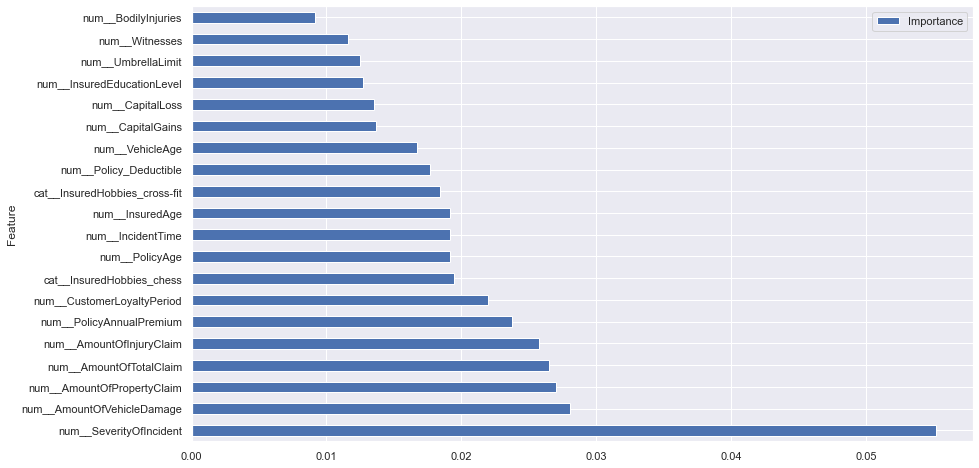

In [96]:
RFC_df_imp[:20].plot.barh(x = 'Feature', y = 'Importance')

__Hyperparameter Tunning__

In [97]:
RFC_pipe[1].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [98]:
params = {'algo__criterion': ['gini'], 
          'algo__max_depth': [None, 10, 20],
          'algo__max_leaf_nodes': [None, 2, 5, 10],
          'algo__n_estimators' : [50, 100, 500]}
RFC_gs = GridSearchCV(RFC_pipe, params, n_jobs = -1)
RFC_gs

GridSearchCV(estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'Incident...
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                                       ('algo', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'algo__criterion': ['gini'],
                         'algo__max_depth': [None, 10, 20],
                         'algo__max_leaf_nodes': [None, 2, 5, 10],
                         'algo__n_estimators': [50, 100, 500]})

In [99]:
RFC_gs.fit(X_train_res, y_train_res)
RFC_gs.best_params_

{'algo__criterion': 'gini',
 'algo__max_depth': None,
 'algo__max_leaf_nodes': None,
 'algo__n_estimators': 500}

In [100]:
RFC_gs.best_score_

0.9828037178385951

In [101]:
RFC_gs_y_train_pred = RFC_gs.predict(X_train_res)
RFC_gs_y_test_pred = RFC_gs.predict(X_test)

In [102]:
print('--Train-- \n')
evaluate_model(y_train_res, RFC_gs_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, RFC_gs_y_test_pred)

--Train-- 

Confusion Matrix 
 [[15788     0]
 [    0 15788]]
Accuracy :  1.0
Recall :  1.0
Precision :  1.0

 Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15788
           1       1.00      1.00      1.00     15788

    accuracy                           1.00     31576
   macro avg       1.00      1.00      1.00     31576
weighted avg       1.00      1.00      1.00     31576

--Test-- 

Confusion Matrix 
 [[5151  112]
 [ 352 1594]]
Accuracy :  0.9356360105423775
Recall :  0.8191161356628982
Precision :  0.9343493552168816

 Report 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5263
           1       0.93      0.82      0.87      1946

    accuracy                           0.94      7209
   macro avg       0.94      0.90      0.91      7209
weighted avg       0.94      0.94      0.93      7209



In [103]:
RFC_gs_f1_score_train = f1_score(y_train_res, RFC_gs_y_train_pred)
print('Train f1 score: ', RFC_gs_f1_score_train)
RFC_gs_f1_score_test = f1_score(y_test, RFC_gs_y_test_pred)
print('Test f1 score: ', RFC_gs_f1_score_test)

Train f1 score:  1.0
Test f1 score:  0.872946330777656


### Model 2: Descision Tree Classifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
DTC_pipe = Pipeline(steps = [('pp', preprocessor),
                            ('algo', DecisionTreeClassifier())])
# max_depth = 20, class_weight='balanced'
DTC_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles...
                                                  Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                ('algo', DecisionTreeClassifier())])

In [105]:
DTC_y_train_pred = DTC_pipe.predict(X_train_res)
DTC_y_test_pred = DTC_pipe.predict(X_test)

In [106]:
print('--Train-- \n')
evaluate_model(y_train_res, DTC_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, DTC_y_test_pred)

--Train-- 

Confusion Matrix 
 [[15788     0]
 [    0 15788]]
Accuracy :  1.0
Recall :  1.0
Precision :  1.0

 Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15788
           1       1.00      1.00      1.00     15788

    accuracy                           1.00     31576
   macro avg       1.00      1.00      1.00     31576
weighted avg       1.00      1.00      1.00     31576

--Test-- 

Confusion Matrix 
 [[4768  495]
 [ 447 1499]]
Accuracy :  0.8693300041614649
Recall :  0.7702980472764646
Precision :  0.7517552657973922

 Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      5263
           1       0.75      0.77      0.76      1946

    accuracy                           0.87      7209
   macro avg       0.83      0.84      0.84      7209
weighted avg       0.87      0.87      0.87      7209



In [107]:
DTC_train_acc = accuracy_score(y_train_res, DTC_y_train_pred)
DTC_test_acc = accuracy_score(y_test, DTC_y_test_pred)

DTC_train_recall = recall_score(y_train_res, DTC_y_train_pred)
DTC_test_recall = recall_score(y_test, DTC_y_test_pred)

DTC_train_pre = precision_score(y_train_res, DTC_y_train_pred)
DTC_test_pre = precision_score(y_test, DTC_y_test_pred)

In [108]:
DTC_f1_score_train = f1_score(y_train_res, DTC_y_train_pred)
print('Train f1 score: ', DTC_f1_score_train)
DTC_f1_score_test = f1_score(y_test, DTC_y_test_pred)
print('Test f1 score: ', DTC_f1_score_test)

Train f1 score:  1.0
Test f1 score:  0.7609137055837563


,Feature,Importance
10,num__SeverityOfIncident,0.214530
1039,cat__InsuredHobbies_cross-fit,0.074628
1038,cat__InsuredHobbies_chess,0.063810
6,num__PolicyAnnualPremium,0.017778
17,num__AmountOfPropertyClaim,0.013268
16,num__AmountOfInjuryClaim,0.012897
4,num__CustomerLoyaltyPeriod,0.010861
15,num__AmountOfTotalClaim,0.010724
11,num__IncidentTime,0.009960
0,num__InsuredAge,0.009227


<AxesSubplot:ylabel='Feature'>

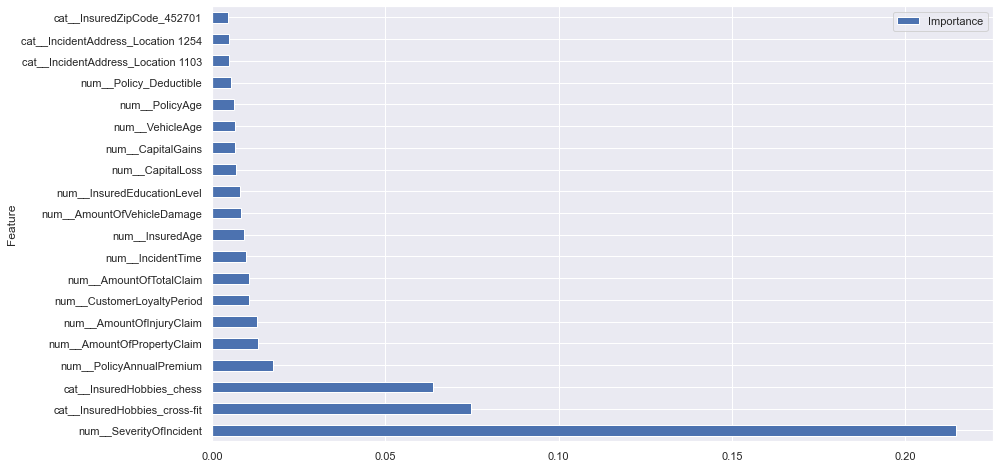

In [109]:
# Extracting top 20 features from the model
DTC_imp = list(zip(DTC_pipe[0].get_feature_names_out(), DTC_pipe[1].feature_importances_))
DTC_df_imp = pd.DataFrame(DTC_imp, columns = ['Feature', 'Importance']).sort_values(by = 'Importance', ascending = False)
display(DTC_df_imp[:20])
DTC_df_imp[:20].plot.barh(x = 'Feature', y = 'Importance')

__Hyperparameter Tunning__

In [110]:
DTC_pipe[1].get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [111]:
params = {'algo__criterion': ['gini'], 
          'algo__random_state':[None, 42],
          'algo__max_leaf_nodes': [None, 2, 5, 10, 20], 
          'algo__max_depth': [None, 10, 20]}
DTC_gs = GridSearchCV(DTC_pipe, params, n_jobs = -1)
DTC_gs

GridSearchCV(estimator=Pipeline(steps=[('pp',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'Incident...
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                                       ('algo', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'algo__criterion': ['gini'],
                         'algo__max_depth': [None, 10, 20],
                         'algo__max_leaf_nodes': [None, 2, 5, 10, 20],
                         'algo__random_state': [None, 42]})

In [112]:
DTC_gs.fit(X_train_res, y_train_res)
DTC_gs.best_params_

{'algo__criterion': 'gini',
 'algo__max_depth': None,
 'algo__max_leaf_nodes': None,
 'algo__random_state': None}

In [113]:
DTC_gs.best_score_

0.9376743651960083

In [114]:
DTC_gs_y_train_pred = DTC_gs.predict(X_train_res)
DTC_gs_y_test_pred = DTC_gs.predict(X_test)

print('--Train-- \n')
evaluate_model(y_train_res, DTC_gs_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, DTC_gs_y_test_pred)

DTC_gs_f1_score_train = f1_score(y_train_res, DTC_gs_y_train_pred)
print('Train f1 score: ', DTC_gs_f1_score_train)
DTC_gs_f1_score_test = f1_score(y_test, DTC_gs_y_test_pred)
print('Test f1 score: ', DTC_gs_f1_score_test)

--Train-- 

Confusion Matrix 
 [[15788     0]
 [    0 15788]]
Accuracy :  1.0
Recall :  1.0
Precision :  1.0

 Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15788
           1       1.00      1.00      1.00     15788

    accuracy                           1.00     31576
   macro avg       1.00      1.00      1.00     31576
weighted avg       1.00      1.00      1.00     31576

--Test-- 

Confusion Matrix 
 [[4764  499]
 [ 428 1518]]
Accuracy :  0.8714107365792759
Recall :  0.7800616649537513
Precision :  0.7526028755577591

 Report 
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      5263
           1       0.75      0.78      0.77      1946

    accuracy                           0.87      7209
   macro avg       0.84      0.84      0.84      7209
weighted avg       0.87      0.87      0.87      7209

Train f1 score:  1.0
Test f1 score:  0.7660862982588948


### Model 3: Logistic Regression

In [115]:
from sklearn.linear_model import LogisticRegression
LR_pipe = Pipeline(steps = [('pp', preprocessor),
                            ('algo', LogisticRegression())])

LR_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles...
                                                  Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                ('algo', LogisticRegression())])

In [116]:
LR_y_train_pred = LR_pipe.predict(X_train_res)
LR_y_test_pred = LR_pipe.predict(X_test)

In [117]:
print('--Train-- \n')
evaluate_model(y_train_res, LR_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, LR_y_test_pred)

--Train-- 

Confusion Matrix 
 [[15351   437]
 [ 2173 13615]]
Accuracy :  0.9173422852799594
Recall :  0.8623638206232582
Precision :  0.9689012240250499

 Report 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92     15788
           1       0.97      0.86      0.91     15788

    accuracy                           0.92     31576
   macro avg       0.92      0.92      0.92     31576
weighted avg       0.92      0.92      0.92     31576

--Test-- 

Confusion Matrix 
 [[5079  184]
 [ 298 1648]]
Accuracy :  0.9331391316410043
Recall :  0.8468653648509764
Precision :  0.8995633187772926

 Report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      5263
           1       0.90      0.85      0.87      1946

    accuracy                           0.93      7209
   macro avg       0.92      0.91      0.91      7209
weighted avg       0.93      0.93      0.93      7209



In [118]:
LR_train_acc = accuracy_score(y_train_res, LR_y_train_pred)
LR_test_acc = accuracy_score(y_test, LR_y_test_pred)

LR_train_recall = recall_score(y_train_res, LR_y_train_pred)
LR_test_recall = recall_score(y_test, LR_y_test_pred)

LR_train_pre = precision_score(y_train_res, LR_y_train_pred)
LR_test_pre = precision_score(y_test, LR_y_test_pred)

In [119]:
LR_f1_score_train = f1_score(y_train_res, LR_y_train_pred)
print('Train f1 score: ', LR_f1_score_train)
LR_f1_score_test = f1_score(y_test, LR_y_test_pred)
print('Test f1 score: ', LR_f1_score_test)

Train f1 score:  0.9125335120643433
Test f1 score:  0.8724192694547379


### Model 4: SVC

In [120]:
from sklearn.svm import SVC
SVC_pipe = Pipeline(steps = [('pp', preprocessor),
                            ('algo', SVC(max_iter = 1000))])

SVC_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles...
                                                  Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                ('algo', SVC(max_iter=1000))])

In [121]:
SVC_y_train_pred = SVC_pipe.predict(X_train_res)
SVC_y_test_pred = SVC_pipe.predict(X_test)

In [122]:
print('--Train-- \n')
evaluate_model(y_train_res, SVC_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, SVC_y_test_pred)

--Train-- 

Confusion Matrix 
 [[12460  3328]
 [ 4728 11060]]
Accuracy :  0.7448695211553078
Recall :  0.7005320496579681
Precision :  0.7686961356686127

 Report 
               precision    recall  f1-score   support

           0       0.72      0.79      0.76     15788
           1       0.77      0.70      0.73     15788

    accuracy                           0.74     31576
   macro avg       0.75      0.74      0.74     31576
weighted avg       0.75      0.74      0.74     31576

--Test-- 

Confusion Matrix 
 [[4014 1249]
 [ 716 1230]]
Accuracy :  0.7274240532667499
Recall :  0.632065775950668
Precision :  0.49616780960064544

 Report 
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      5263
           1       0.50      0.63      0.56      1946

    accuracy                           0.73      7209
   macro avg       0.67      0.70      0.68      7209
weighted avg       0.75      0.73      0.74      7209



In [123]:
SVC_train_acc = accuracy_score(y_train_res, SVC_y_train_pred)
SVC_test_acc = accuracy_score(y_test, SVC_y_test_pred)

SVC_train_recall = recall_score(y_train_res, SVC_y_train_pred)
SVC_test_recall = recall_score(y_test, SVC_y_test_pred)

SVC_train_pre = precision_score(y_train_res, SVC_y_train_pred)
SVC_test_pre = precision_score(y_test, SVC_y_test_pred)

In [124]:
SVC_f1_score_train = f1_score(y_train_res, SVC_y_train_pred)
print('Train f1 score: ', SVC_f1_score_train)
SVC_f1_score_test = f1_score(y_test, SVC_y_test_pred)
print('Test f1 score: ', SVC_f1_score_test)

Train f1 score:  0.733032873806999
Test f1 score:  0.5559322033898305


### Model 5: AdaBoostClassifier

In [125]:
from sklearn.ensemble import AdaBoostClassifier
ABC_pipe = Pipeline(steps = [('pp', preprocessor),
                            ('algo', AdaBoostClassifier())])

ABC_pipe.fit(X_train_res, y_train_res)

Pipeline(steps=[('pp',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scalar',
                                                                   StandardScaler())]),
                                                  Index(['InsuredAge', 'InsuredEducationLevel', 'CapitalGains', 'CapitalLoss',
       'CustomerLoyaltyPeriod', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'SplitLimit', 'CombinedSingleLimit',
       'SeverityOfIncident', 'IncidentTime', 'NumberOfVehicles...
                                                  Index(['InsuredZipCode', 'InsuredGender', 'InsuredOccupation',
       'InsuredHobbies', 'InsurancePolicyState', 'InsuredRelationship',
       'TypeOfIncident', 'TypeOfCollission', 'AuthoritiesContacted',
       'IncidentState', 'IncidentCity', 'IncidentAddress', 'PropertyDamage',
       'PoliceReport', 'VehicleMake', 'VehicleModel', 'VehicleYOM'],
      dtype='object'))])),
                ('algo', AdaBoostClassifier())])

In [126]:
ABC_y_train_pred = ABC_pipe.predict(X_train_res)
ABC_y_test_pred = ABC_pipe.predict(X_test)

In [127]:
print('--Train-- \n')
evaluate_model(y_train_res, ABC_y_train_pred)
print('--Test-- \n')
evaluate_model(y_test, ABC_y_test_pred)

--Train-- 

Confusion Matrix 
 [[13303  2485]
 [ 3149 12639]]
Accuracy :  0.8215733468457056
Recall :  0.8005447175069673
Precision :  0.83569161597461

 Report 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83     15788
           1       0.84      0.80      0.82     15788

    accuracy                           0.82     31576
   macro avg       0.82      0.82      0.82     31576
weighted avg       0.82      0.82      0.82     31576

--Test-- 

Confusion Matrix 
 [[4407  856]
 [ 415 1531]]
Accuracy :  0.823692606464142
Recall :  0.7867420349434738
Precision :  0.6413908671973189

 Report 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      5263
           1       0.64      0.79      0.71      1946

    accuracy                           0.82      7209
   macro avg       0.78      0.81      0.79      7209
weighted avg       0.84      0.82      0.83      7209



In [128]:
ABC_train_acc = accuracy_score(y_train_res, ABC_y_train_pred)
ABC_test_acc = accuracy_score(y_test, ABC_y_test_pred)

ABC_train_recall = recall_score(y_train_res, ABC_y_train_pred)
ABC_test_recall = recall_score(y_test, ABC_y_test_pred)

ABC_train_pre = precision_score(y_train_res, ABC_y_train_pred)
ABC_test_pre = precision_score(y_test, ABC_y_test_pred)

In [129]:
ABC_f1_score_train = f1_score(y_train_res, ABC_y_train_pred)
print('Train f1 score: ', ABC_f1_score_train)
ABC_f1_score_test = f1_score(y_test, ABC_y_test_pred)
print('Test f1 score: ', ABC_f1_score_test)

Train f1 score:  0.8177406832298137
Test f1 score:  0.7066697438264483


## Metrics Summary

In [130]:
summary_metrics = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decession Tree Classifier', 'Random Forest Classifier', 
               'Support Vector Classification', 'AdaBoost Classifier'],
    'Train Accuracy' : [LR_train_acc, DTC_train_acc, RFC_train_acc, SVC_train_acc, ABC_train_acc],
    'Test Accuracy' : [LR_test_acc, DTC_test_acc, RFC_test_acc, SVC_test_acc, ABC_test_acc],
    'Train Recall' : [LR_train_recall, DTC_train_recall, RFC_train_recall, SVC_train_recall, ABC_train_recall],
    'Test Recall' : [LR_test_recall, DTC_test_recall, RFC_test_recall, SVC_test_recall, ABC_test_recall],
    'Train Precision' : [LR_train_pre, DTC_train_pre, RFC_train_pre, SVC_train_pre, ABC_train_pre],
    'Test Precision' : [LR_test_pre, DTC_test_pre, RFC_test_pre, SVC_test_pre, ABC_test_pre],
    'Train f1 Score' : [LR_f1_score_train, DTC_f1_score_train, RFC_f1_score_train, SVC_f1_score_train, ABC_f1_score_train],
    'Test f1 Score' : [LR_f1_score_test, DTC_f1_score_test, RFC_f1_score_test, SVC_f1_score_test, ABC_f1_score_test]
})
summary_metrics

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train f1 Score,Test f1 Score
0,Logistic Regression,0.917342,0.933139,0.862364,0.846865,0.968901,0.899563,0.912534,0.872419
1,Decession Tree Classifier,1.000000,0.869330,1.000000,0.770298,1.000000,0.751755,1.000000,0.760914
2,Random Forest Classifier,1.000000,0.935220,1.000000,0.818602,1.000000,0.933216,1.000000,0.872160
3,Support Vector Classification,0.744870,0.727424,0.700532,0.632066,0.768696,0.496168,0.733033,0.555932
4,AdaBoost Classifier,0.821573,0.823693,0.800545,0.786742,0.835692,0.641391,0.817741,0.706670


### Predicting on Test_data

In [154]:
# predicting without hyperparameter tuning
y_pred_model = RFC_pipe.predict(Test_data)

In [155]:
y_pred_model

array([0, 0, 0, ..., 0, 0, 0])

In [156]:
Pred_data = pd.read_csv('Test.csv')
Pred_data

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003
...,...
8907,Cust37942
8908,Cust20528
8909,Cust36797
8910,Cust28499


In [157]:
Pred_data['ReportedFraud'] = y_pred_model
Pred_data

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [158]:
Pred_data['ReportedFraud'].value_counts()

0    7534
1    1378
Name: ReportedFraud, dtype: int64

In [159]:
Pred_data.shape

(8912, 2)

In [160]:
#Pred_data.to_csv('3_B_S_Raksha_11.5.2023.csv', index = False)

In [161]:
# predicting with tuned model
y_pred_model_gs = RFC_gs.predict(Test_data)

In [162]:
Pred_data_gs = pd.read_csv('Test.csv')
Pred_data_gs['ReportedFraud'] = y_pred_model_gs
Pred_data_gs

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [163]:
Pred_data_gs['ReportedFraud'].value_counts()

0    7519
1    1393
Name: ReportedFraud, dtype: int64